#                                                      Importation des Dépendances

In [193]:
import numpy as np
import pandas as pd

# Collection des données et Prétraitement

In [194]:
#chargement des données du fichier csv dans un dataframe pandas

data = pd.read_csv('C:\\Users\\PC\\Desktop\\Project Email Detection\\Database\\data-en-hi-de-fr.csv')


In [195]:
data.tail(5)

labels                                               text  \
5567   spam  This is the 2nd time we have tried 2 contact u...   
5568    ham               Will ü b going to esplanade fr home?   
5569    ham  Pity, * was in mood for that. So...any other s...   
5570    ham  The guy did some bitching but I acted like i'd...   
5571    ham                         Rofl. Its true to its name   

                                                text_hi  \
5567  यह 2 सेकंड है जब हमने 2 संपर्क की कोशिश की है....   
5568      क्या कलाई घर का पता लगाने के लिए जा रही होगी?   
5569                      तो फिर, दूसरे सुझाव क्या हैं?   
5570  आदमी कुछ कुतियािंग किया लेकिन मैं मैं कुछ और ख...   
5571                     उसकी पीठ के नाम पर इसकी सच्चाई   

                                                text_de  \
5567  Dies ist das zweite Mal, dass wir versucht hab...   
5568              Wird u b gehen, um esplanade fr home?   
5569  Schade, * war in Stimmung dafür. Also... irgen...   
5570  Der Typ hat ein bisschen rumgeschnüffelt, aber...   
5571                     Rofl. Es ist seinem Namen treu   

                                                text_fr  
5567  C'est la 2ème fois que nous avons essayé 2 con...  
5568        Est-ce que ü b ira à l'esplanade en maison?  
5569  Dommage, * était d'humeur pour ça. Donc... d'a...  
5570  Le type a fait une saloperie mais j'ai agi com...  
5571                         Rofl. C'est vrai à son nom

In [196]:
data.shape

(5572, 5)

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   labels   5572 non-null   object
 1   text     5572 non-null   object
 2   text_hi  5572 non-null   object
 3   text_de  5572 non-null   object
 4   text_fr  5572 non-null   object
dtypes: object(5)
memory usage: 217.8+ KB


In [198]:
data.sample(5)

labels                                               text  \
2617    ham          I went to ur hon lab but no one is there.   
5154    ham                    Like  &lt;#&gt; , same question   
5525    ham  I want to tell you how bad I feel that basical...   
1918    ham  We not leaving yet. Ok lor then we go elsewher...   
535     ham  I've not called you in a while. This is hoping...   

                                                text_hi  \
2617  मैं वहाँ कोई नहीं है लेकिन थॉन प्रयोगशाला के ल...   
5154                         के रूप में;#gt; एक ही सवाल   
5525  मैं आपको बताना चाहता हूँ कि मैं कितना बुरा महस...   
1918  हम अभी तक नहीं जा रहे हैं. Okrr तो हम कहीं और ...   
535   मैं तुम्हें कुछ समय में नहीं बुलाया है. यह उम्...   

                                                text_de  \
2617             Ich war im Labor, aber niemand ist da.   
5154                      Wie &lt;#&gt;, dieselbe Frage   
5525  Ich möchte Ihnen sagen, wie schlecht ich mich ...   
1918                 Ok, dann gehen wir woanders essen.   
535   Ich habe dich schon lange nicht mehr angerufen...   

                                                text_fr  
2617  Je suis allé au labo ur hon, mais personne n'e...  
5154                     Comme &lt;#&gt;, même question  
5525  Je veux te dire à quel point je me sens mal qu...  
1918                        Nous ne partons pas encore.  
535   Je ne t'ai pas appelé depuis un moment. C'est ...

In [199]:
#Renommer les colonnes du dataset 

data.rename(columns={'text':'Mail-Text-Eng','text_hi':'Mail-Text-Hindi','text_de':'Mail-Text-Deutch','text_fr':'Mail-Text-French'},inplace=True)

In [200]:
#Affichage des colonnes renommés

data.sample(5)

labels                                      Mail-Text-Eng  \
2203    ham  (And my man carlos is definitely coming by mu ...   
476     ham  Ok I'm gonna head up to usf in like fifteen mi...   
5570    ham  The guy did some bitching but I acted like i'd...   
4697    ham  A guy who gets used but is too dumb to realize...   
3053    ham  Please leave this topic..sorry for telling that..   

                                        Mail-Text-Hindi  \
2203  (मेरा आदमी कारोस निश्चित रूप से आज रात आ रहा ह...   
476       Ok मैं 15 मिनट की तरह हम पर सिर करने वाला हूँ   
5570  आदमी कुछ कुतियािंग किया लेकिन मैं मैं कुछ और ख...   
4697  एक आदमी जो प्रयोग किया जाता है लेकिन यह समझने ...   
3053         यह बताने के लिए कृपया इस विषय को छोड़ दें.   

                                       Mail-Text-Deutch  \
2203  (Und mein Mann Carlos kommt heute Abend defini...   
476                  Ok, ich gehe in 15 Minuten zu uns.   
5570  Der Typ hat ein bisschen rumgeschnüffelt, aber...   
4697  Ein Typ, der benutzt wird, aber zu dumm ist, u...   
3053  Bitte lassen Sie dieses Thema..sorry, dass Sie...   

                                       Mail-Text-French  
2203  (Et mon homme Carlos vient certainement par mu...  
476            Ok je vais aller à l'usf dans 15 minutes  
5570  Le type a fait une saloperie mais j'ai agi com...  
4697  Un type qui s'en sert mais qui est trop bête p...  
3053  S'il vous plaît, laissez ce sujet..désolé d'av...

In [201]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [202]:
data['labels'] = encoder.fit_transform(data['labels'])

In [203]:
# Affichage de deux lignes et de toutes les colonnes   

data.tail(2)

labels                                      Mail-Text-Eng  \
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

                                        Mail-Text-Hindi  \
5570  आदमी कुछ कुतियािंग किया लेकिन मैं मैं कुछ और ख...   
5571                     उसकी पीठ के नाम पर इसकी सच्चाई   

                                       Mail-Text-Deutch  \
5570  Der Typ hat ein bisschen rumgeschnüffelt, aber...   
5571                     Rofl. Es ist seinem Namen treu   

                                       Mail-Text-French  
5570  Le type a fait une saloperie mais j'ai agi com...  
5571                         Rofl. C'est vrai à son nom

In [204]:
#La Vérification des valeurs manquantes

data.isna().sum()

labels              0
Mail-Text-Eng       0
Mail-Text-Hindi     0
Mail-Text-Deutch    0
Mail-Text-French    0
dtype: int64

In [205]:
# Affichage des mots dupliqués

data.duplicated().sum()

415

In [206]:
#Suppression de la duplication

data = data.drop_duplicates(keep = 'first')

In [207]:
#Vérification

data.duplicated().sum()

0

In [208]:
data.head()

labels                                      Mail-Text-Eng  \
0       0  Go until jurong point, crazy.. Available only ...   
1       0                      Ok lar... Joking wif u oni...   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...   
3       0  U dun say so early hor... U c already then say...   
4       0  Nah I don't think he goes to usf, he lives aro...   

                                     Mail-Text-Hindi  \
0  Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान वि...   
1                         ओके लामर.... if if uue पर.   
2  Fktatatat 21 मई को प्राप्त करने के लिए मुफ्त प...   
3  Uden इतना जल्दी कहते हैं... तो पहले से ही यूसी...   
4  नहीं, मुझे नहीं लगता कि वह हमारे लिए चला जाता ...   

                                    Mail-Text-Deutch  \
0  Gehen Sie bis jurong Punkt, verrückt.. Verfügb...   
1                      Ok Lar... joking wif u oni...   
2  Freier Eintritt in 2 a wkly comp zum Gewinn FA...   
3     U dun sagen so früh... U c schon dann sagen...   
4  Nein, ich glaube nicht, dass er zu unsf geht, ...   

                                    Mail-Text-French  
0  Allez jusqu'à Jurong point, fou.. Disponible s...  
1           J'ai fait une blague sur le wif u oni...  
2  Entrée libre dans 2 a wkly comp pour gagner FA...  
3     U dun dit si tôt hor... U c déjà dire alors...  
4  Non, je ne pense pas qu'il va à usf, il vit da...

In [209]:
data.shape

(5157, 5)

In [210]:

data.head()

labels                                      Mail-Text-Eng  \
0       0  Go until jurong point, crazy.. Available only ...   
1       0                      Ok lar... Joking wif u oni...   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...   
3       0  U dun say so early hor... U c already then say...   
4       0  Nah I don't think he goes to usf, he lives aro...   

                                     Mail-Text-Hindi  \
0  Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान वि...   
1                         ओके लामर.... if if uue पर.   
2  Fktatatat 21 मई को प्राप्त करने के लिए मुफ्त प...   
3  Uden इतना जल्दी कहते हैं... तो पहले से ही यूसी...   
4  नहीं, मुझे नहीं लगता कि वह हमारे लिए चला जाता ...   

                                    Mail-Text-Deutch  \
0  Gehen Sie bis jurong Punkt, verrückt.. Verfügb...   
1                      Ok Lar... joking wif u oni...   
2  Freier Eintritt in 2 a wkly comp zum Gewinn FA...   
3     U dun sagen so früh... U c schon dann sagen...   
4  Nein, ich glaube nicht, dass er zu unsf geht, ...   

                                    Mail-Text-French  
0  Allez jusqu'à Jurong point, fou.. Disponible s...  
1           J'ai fait une blague sur le wif u oni...  
2  Entrée libre dans 2 a wkly comp pour gagner FA...  
3     U dun dit si tôt hor... U c déjà dire alors...  
4  Non, je ne pense pas qu'il va à usf, il vit da...

# Visualisation des Données

In [211]:
data['labels'].value_counts()

labels
0    4516
1     641
Name: count, dtype: int64

# Diagramme Circulaire

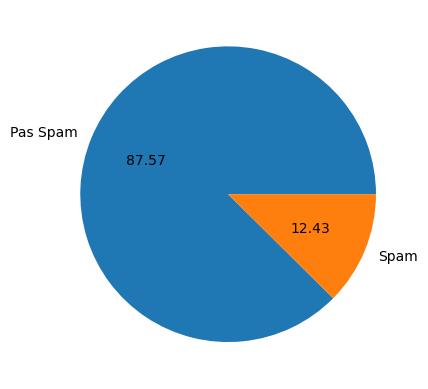

In [212]:
#Importation de la bibliothèque matplotlib pour la visualisation des données sur un diagramme

import matplotlib.pyplot as plt
from PIL import Image
plt.pie(data['labels'].value_counts(),labels=['Pas Spam','Spam'],autopct="%0.2f")
plt.show()

In [214]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [215]:
# Liste des colonnes à traiter
columns = ['Mail-Text-Eng', 'Mail-Text-Hindi', 'Mail-Text-Deutch', 'Mail-Text-French']

# Applique la fonction len() à chaque colonne et stocker le résultat dans de nouvelles colonnes
for column in columns:
    data[f'num_characters_{column.split("-")[-1]}'] = data[column].apply(len)


In [216]:
# Dictionnaire de mappage pour renommer les colonnes
rename_dict = {
    'num_characters_Eng': 'Character_Count_Eng',
    'num_characters_Hindi': 'Character_Count_Hindi',
    'num_characters_Deutch': 'Character_Count_Deutch',
    'num_characters_French': 'Character_Count_French'
}

# Renommer les colonnes
data.rename(columns=rename_dict, inplace=True)


In [217]:
data.head(3)

labels                                      Mail-Text-Eng  \
0       0  Go until jurong point, crazy.. Available only ...   
1       0                      Ok lar... Joking wif u oni...   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...   

                                     Mail-Text-Hindi  \
0  Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान वि...   
1                         ओके लामर.... if if uue पर.   
2  Fktatatat 21 मई को प्राप्त करने के लिए मुफ्त प...   

                                    Mail-Text-Deutch  \
0  Gehen Sie bis jurong Punkt, verrückt.. Verfügb...   
1                      Ok Lar... joking wif u oni...   
2  Freier Eintritt in 2 a wkly comp zum Gewinn FA...   

                                    Mail-Text-French  Character_Count_Eng  \
0  Allez jusqu'à Jurong point, fou.. Disponible s...                  111   
1           J'ai fait une blague sur le wif u oni...                   29   
2  Entrée libre dans 2 a wkly comp pour gagner FA...                  155   

   Character_Count_Hindi  Character_Count_Deutch  Character_Count_French  
0                     96                     119                     117  
1                     26                      29                      40  
2                    170                     169                     175

# Traitement des datasets en Français

In [218]:
data['Mail-Text-French'].apply(lambda x:nltk.word_tokenize(x)) ## Décomposition des phrases en des mots

0       [Allez, jusqu, ', à, Jurong, point, ,, fou, .....
1       [J'ai, fait, une, blague, sur, le, wif, u, oni...
2       [Entrée, libre, dans, 2, a, wkly, comp, pour, ...
3       [U, dun, dit, si, tôt, hor, ..., U, c, déjà, d...
4       [Non, ,, je, ne, pense, pas, qu'il, va, à, usf...
                              ...                        
5567    [C'est, la, 2ème, fois, que, nous, avons, essa...
5568    [Est-ce, que, ü, b, ira, à, l'esplanade, en, m...
5569    [Dommage, ,, *, était, d'humeur, pour, ça, ., ...
5570    [Le, type, a, fait, une, saloperie, mais, j'ai...
5571                  [Rofl, ., C'est, vrai, à, son, nom]
Name: Mail-Text-French, Length: 5157, dtype: object

# English

In [219]:
data['Mail-Text-Eng'].apply(lambda x:nltk.word_tokenize(x)) ## Décomposition des phrases en des mots

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, ü, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Mail-Text-Eng, Length: 5157, dtype: object

# Allemand

In [220]:
data['Mail-Text-Deutch'].apply(lambda x:nltk.word_tokenize(x)) ## Décomposition des phrases en des mots

0       [Gehen, Sie, bis, jurong, Punkt, ,, verrückt, ...
1                [Ok, Lar, ..., joking, wif, u, oni, ...]
2       [Freier, Eintritt, in, 2, a, wkly, comp, zum, ...
3       [U, dun, sagen, so, früh, ..., U, c, schon, da...
4       [Nein, ,, ich, glaube, nicht, ,, dass, er, zu,...
                              ...                        
5567    [Dies, ist, das, zweite, Mal, ,, dass, wir, ve...
5568    [Wird, u, b, gehen, ,, um, esplanade, fr, home...
5569    [Schade, ,, *, war, in, Stimmung, dafür, ., Al...
5570    [Der, Typ, hat, ein, bisschen, rumgeschnüffelt...
5571              [Rofl, ., Es, ist, seinem, Namen, treu]
Name: Mail-Text-Deutch, Length: 5157, dtype: object

# Hindi

In [221]:
data['Mail-Text-Hindi'].apply(lambda x:nltk.word_tokenize(x)) ## Décomposition des phrases en des mots

0       [Dakag, बिंदु, तक, जाओ, ,, पागल, ., केवल, Bag,...
1                   [ओके, लामर, ...., if, if, uue, पर, .]
2       [Fktatatat, 21, मई, को, प्राप्त, करने, के, लिए...
3       [Uden, इतना, जल्दी, कहते, हैं, ..., तो, पहले, ...
4       [नहीं, ,, मुझे, नहीं, लगता, कि, वह, हमारे, लिए...
                              ...                        
5567    [यह, 2, सेकंड, है, जब, हमने, 2, संपर्क, की, को...
5568    [क्या, कलाई, घर, का, पता, लगाने, के, लिए, जा, ...
5569             [तो, फिर, ,, दूसरे, सुझाव, क्या, हैं, ?]
5570    [आदमी, कुछ, कुतियािंग, किया, लेकिन, मैं, मैं, ...
5571               [उसकी, पीठ, के, नाम, पर, इसकी, सच्चाई]
Name: Mail-Text-Hindi, Length: 5157, dtype: object

# Comptage des mots contenues dans la dataframe en Hindi

In [222]:
data['Mail-Text-Hindi'].apply(lambda x:len(nltk.word_tokenize(x))) ## Comptage des mots utilisés en E-mail

0       23
1        8
2       36
3       14
4       20
        ..
5567    34
5568    12
5569     8
5570    25
5571     7
Name: Mail-Text-Hindi, Length: 5157, dtype: int64

# Comptage des mots contenues dans le dataframe en Allemand 

In [223]:
data['Mail-Text-Deutch'].apply(lambda x:len(nltk.word_tokenize(x))) ## Comptage des mots utilisés en E-mail

0       25
1        8
2       39
3       12
4       19
        ..
5567    39
5568    10
5569    14
5570    28
5571     7
Name: Mail-Text-Deutch, Length: 5157, dtype: int64

# Comptage des mots contenues dans la dataframe en Anglais

In [224]:
data['Mail-Text-Eng'].apply(lambda x:len(nltk.word_tokenize(x))) ## Comptage des mots utilisés en E-mail

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: Mail-Text-Eng, Length: 5157, dtype: int64

# Comptage des mots contenues dans la dataframe en Français

In [225]:
data['Mail-Text-French'].apply(lambda x:len(nltk.word_tokenize(x))) ## Comtage des mots utilisés en E-mail

0       27
1       10
2       38
3       13
4       17
        ..
5567    35
5568    10
5569    13
5570    28
5571     7
Name: Mail-Text-French, Length: 5157, dtype: int64

In [226]:
data['Word Count'] = data['Mail-Text-Hindi'].apply(lambda x:len(nltk.word_tokenize(x)))

In [227]:
data[['Mail-Text-Hindi', 'Character_Count_Hindi', 'Word Count']].head(4)

Mail-Text-Hindi  Character_Count_Hindi  \
0  Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान वि...                     96   
1                         ओके लामर.... if if uue पर.                     26   
2  Fktatatat 21 मई को प्राप्त करने के लिए मुफ्त प...                    170   
3  Uden इतना जल्दी कहते हैं... तो पहले से ही यूसी...                     58   

   Word Count  
0          23  
1           8  
2          36  
3          14

In [228]:
data['Word Count'] = data['Mail-Text-Deutch'].apply(lambda x:len(nltk.word_tokenize(x)))

In [229]:
data[['Mail-Text-Deutch', 'Character_Count_Deutch', 'Word Count']].head(4)

Mail-Text-Deutch  Character_Count_Deutch  \
0  Gehen Sie bis jurong Punkt, verrückt.. Verfügb...                     119   
1                      Ok Lar... joking wif u oni...                      29   
2  Freier Eintritt in 2 a wkly comp zum Gewinn FA...                     169   
3     U dun sagen so früh... U c schon dann sagen...                      46   

   Word Count  
0          25  
1           8  
2          39  
3          12

In [230]:
data['Word Count'] = data['Mail-Text-Eng'].apply(lambda x:len(nltk.word_tokenize(x)))

In [231]:
data[['Mail-Text-Eng', 'Character_Count_Eng', 'Word Count']].head(4)

Mail-Text-Eng  Character_Count_Eng  \
0  Go until jurong point, crazy.. Available only ...                  111   
1                      Ok lar... Joking wif u oni...                   29   
2  Free entry in 2 a wkly comp to win FA Cup fina...                  155   
3  U dun say so early hor... U c already then say...                   49   

   Word Count  
0          24  
1           8  
2          37  
3          13

In [232]:
data['Word Count'] = data['Mail-Text-French'].apply(lambda x:len(nltk.word_tokenize(x)))

In [233]:
data[['Mail-Text-French', 'Character_Count_French', 'Word Count']].head(4)

Mail-Text-French  Character_Count_French  \
0  Allez jusqu'à Jurong point, fou.. Disponible s...                     117   
1           J'ai fait une blague sur le wif u oni...                      40   
2  Entrée libre dans 2 a wkly comp pour gagner FA...                     175   
3     U dun dit si tôt hor... U c déjà dire alors...                      46   

   Word Count  
0          27  
1          10  
2          38  
3          13

In [234]:
data['Sentence Count']=data['Mail-Text-Hindi'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [235]:
data[['Mail-Text-Hindi', 'Character_Count_Hindi', 'Word Count', 'Sentence Count']].head(4)


Mail-Text-Hindi  Character_Count_Hindi  \
0  Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान वि...                     96   
1                         ओके लामर.... if if uue पर.                     26   
2  Fktatatat 21 मई को प्राप्त करने के लिए मुफ्त प...                    170   
3  Uden इतना जल्दी कहते हैं... तो पहले से ही यूसी...                     58   

   Word Count  Sentence Count  
0          27               2  
1          10               1  
2          38               3  
3          13               1

In [236]:
data['Sentence Count']=data['Mail-Text-Deutch'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [237]:
data[['Mail-Text-Deutch', 'Character_Count_Deutch', 'Word Count', 'Sentence Count']].head(4)

Mail-Text-Deutch  Character_Count_Deutch  \
0  Gehen Sie bis jurong Punkt, verrückt.. Verfügb...                     119   
1                      Ok Lar... joking wif u oni...                      29   
2  Freier Eintritt in 2 a wkly comp zum Gewinn FA...                     169   
3     U dun sagen so früh... U c schon dann sagen...                      46   

   Word Count  Sentence Count  
0          27               1  
1          10               1  
2          38               3  
3          13               1

In [238]:
data['Sentence Count']=data['Mail-Text-Eng'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [239]:
data[['Mail-Text-Eng', 'Character_Count_Eng', 'Word Count', 'Sentence Count']].head(4)

Mail-Text-Eng  Character_Count_Eng  \
0  Go until jurong point, crazy.. Available only ...                  111   
1                      Ok lar... Joking wif u oni...                   29   
2  Free entry in 2 a wkly comp to win FA Cup fina...                  155   
3  U dun say so early hor... U c already then say...                   49   

   Word Count  Sentence Count  
0          27               2  
1          10               2  
2          38               2  
3          13               1

In [240]:
data['Sentence Count']=data['Mail-Text-French'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [241]:
data[['Mail-Text-French', 'Character_Count_French', 'Word Count', 'Sentence Count']].head(4)

Mail-Text-French  Character_Count_French  \
0  Allez jusqu'à Jurong point, fou.. Disponible s...                     117   
1           J'ai fait une blague sur le wif u oni...                      40   
2  Entrée libre dans 2 a wkly comp pour gagner FA...                     175   
3     U dun dit si tôt hor... U c déjà dire alors...                      46   

   Word Count  Sentence Count  
0          27               1  
1          10               1  
2          38               2  
3          13               1

In [242]:
data.describe()

labels  Character_Count_Eng  Character_Count_Hindi  \
count  5157.000000          5157.000000            5157.000000   
mean      0.124297            79.104324              74.390731   
std       0.329952            58.384729              61.381158   
min       0.000000             2.000000               2.000000   
25%       0.000000            36.000000              33.000000   
50%       0.000000            61.000000              56.000000   
75%       0.000000           118.000000             102.000000   
max       1.000000           910.000000            1406.000000   

       Character_Count_Deutch  Character_Count_French   Word Count  \
count             5157.000000             5157.000000  5157.000000   
mean                89.377933               86.719411    18.170448   
std                 70.559754               68.244124    13.831548   
min                  5.000000                2.000000     1.000000   
25%                 39.000000               38.000000     9.000000   
50%                 65.000000               63.000000    14.000000   
75%                132.000000              127.000000    26.000000   
max               1019.000000              986.000000   208.000000   

       Sentence Count  
count     5157.000000  
mean         1.612372  
std          1.226812  
min          1.000000  
25%          1.000000  
50%          1.000000  
75%          2.000000  
max         22.000000

In [243]:
# Description des fonctions pour les messages NON Spams

data[data['labels'] == 0][['Character_Count_Hindi','Word Count','Sentence Count']].describe()

Character_Count_Hindi   Word Count  Sentence Count
count            4516.000000  4516.000000     4516.000000
mean               68.323074    16.661869        1.433791
std                60.647239    13.863555        1.076601
min                 2.000000     1.000000        1.000000
25%                32.000000     8.000000        1.000000
50%                50.000000    12.000000        1.000000
75%                88.000000    21.000000        1.000000
max              1406.000000   208.000000       22.000000

In [244]:
# Description des fonctions pour les messages NON Spams

data[data['labels'] == 0][['Character_Count_Deutch','Word Count','Sentence Count']].describe()

Character_Count_Deutch   Word Count  Sentence Count
count             4516.000000  4516.000000     4516.000000
mean                80.151019    16.661869        1.433791
std                 69.376730    13.863555        1.076601
min                  5.000000     1.000000        1.000000
25%                 37.000000     8.000000        1.000000
50%                 58.000000    12.000000        1.000000
75%                103.000000    21.000000        1.000000
max               1019.000000   208.000000       22.000000

In [245]:
# Description des fonctions pour les messages NON Spams

data[data['labels'] == 0][['Character_Count_Eng','Word Count','Sentence Count']].describe()

Character_Count_Eng   Word Count  Sentence Count
count          4516.000000  4516.000000     4516.000000
mean             70.869796    16.661869        1.433791
std              56.710489    13.863555        1.076601
min               2.000000     1.000000        1.000000
25%              34.000000     8.000000        1.000000
50%              53.000000    12.000000        1.000000
75%              91.000000    21.000000        1.000000
max             910.000000   208.000000       22.000000

In [246]:
# Description des fonctions pour les messages NON Spams

data[data['labels'] == 0][['Character_Count_French','Word Count','Sentence Count']].describe()

Character_Count_French   Word Count  Sentence Count
count             4516.000000  4516.000000     4516.000000
mean                76.757307    16.661869        1.433791
std                 65.754495    13.863555        1.076601
min                  2.000000     1.000000        1.000000
25%                 35.000000     8.000000        1.000000
50%                 55.000000    12.000000        1.000000
75%                 99.000000    21.000000        1.000000
max                986.000000   208.000000       22.000000

In [247]:
# Description des fonctions pour les messages Spams

data[data['labels'] == 1][['Character_Count_Hindi','Word Count','Sentence Count']].describe()

Character_Count_Hindi  Word Count  Sentence Count
count             641.000000  641.000000      641.000000
mean              117.138846   28.798752        2.870515
std                48.117575    7.494064        1.462154
min                 4.000000    2.000000        1.000000
25%                85.000000   26.000000        2.000000
50%               123.000000   30.000000        3.000000
75%               151.000000   34.000000        4.000000
max               313.000000   46.000000        8.000000

In [248]:
# Description des fonctions pour les messages Spams

data[data['labels'] == 1][['Character_Count_Deutch','Word Count','Sentence Count']].describe()

Character_Count_Deutch  Word Count  Sentence Count
count              641.000000  641.000000      641.000000
mean               154.383775   28.798752        2.870515
std                 36.348951    7.494064        1.462154
min                 13.000000    2.000000        1.000000
25%                142.000000   26.000000        2.000000
50%                164.000000   30.000000        3.000000
75%                178.000000   34.000000        4.000000
max                241.000000   46.000000        8.000000

In [249]:
# Description des fonctions pour les messages Spams

data[data['labels'] == 1][['Character_Count_Eng','Word Count','Sentence Count']].describe()

Character_Count_Eng  Word Count  Sentence Count
count           641.000000  641.000000      641.000000
mean            137.118565   28.798752        2.870515
std              30.399707    7.494064        1.462154
min               7.000000    2.000000        1.000000
25%             130.000000   26.000000        2.000000
50%             148.000000   30.000000        3.000000
75%             157.000000   34.000000        4.000000
max             223.000000   46.000000        8.000000

In [250]:
# Description des fonctions pour les messages Spams

data[data['labels'] == 1][['Character_Count_French','Word Count','Sentence Count']].describe()

Character_Count_French  Word Count  Sentence Count
count              641.000000  641.000000      641.000000
mean               156.904836   28.798752        2.870515
std                 37.202848    7.494064        1.462154
min                  8.000000    2.000000        1.000000
25%                145.000000   26.000000        2.000000
50%                166.000000   30.000000        3.000000
75%                180.000000   34.000000        4.000000
max                262.000000   46.000000        8.000000

# Importation de la Bibliothèque Seaborn

In [251]:
 import seaborn as sns

<Axes: xlabel='Character_Count_Hindi', ylabel='Count'>

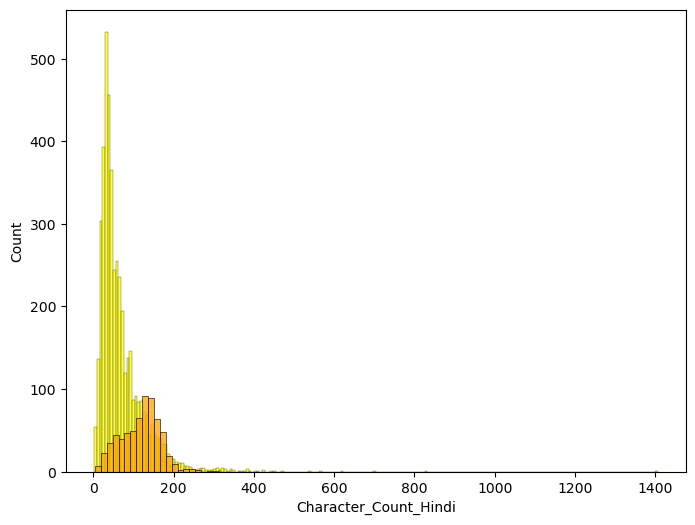

In [252]:
## Histogram plot (Historigramme)
plt.figure(figsize=(8,6))
sns.histplot(data[data['labels']==0]['Character_Count_Hindi'],color = 'yellow')
sns.histplot(data[data['labels']==1]['Character_Count_Hindi'],color = 'orange')

<Axes: xlabel='Character_Count_Deutch', ylabel='Count'>

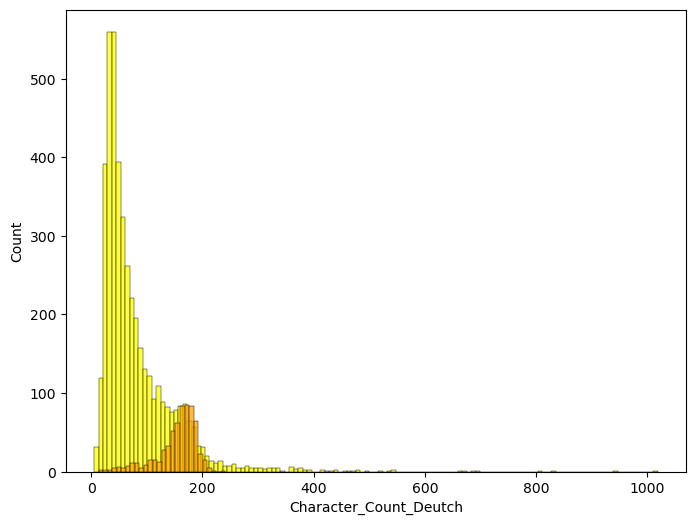

In [253]:
## Histogram plot (Historigramme)
plt.figure(figsize=(8,6))
sns.histplot(data[data['labels']==0]['Character_Count_Deutch'],color = 'yellow')
sns.histplot(data[data['labels']==1]['Character_Count_Deutch'],color = 'orange')

<Axes: xlabel='Character_Count_Eng', ylabel='Count'>

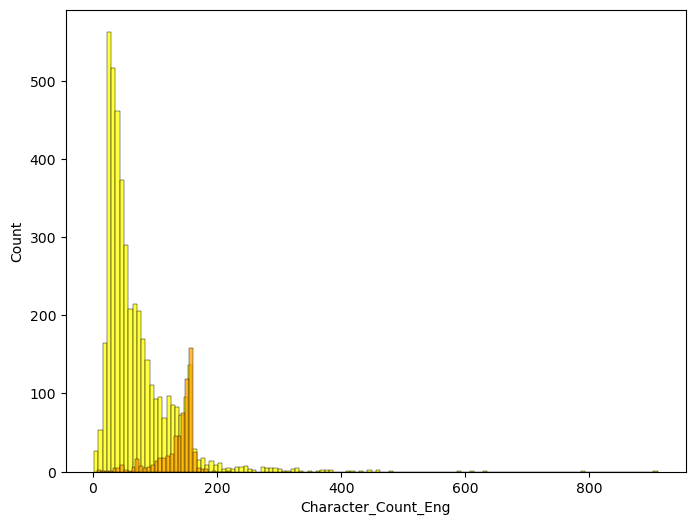

In [254]:
## Histogram plot (Historigramme)
plt.figure(figsize=(8,6))
sns.histplot(data[data['labels']==0]['Character_Count_Eng'],color = 'yellow')
sns.histplot(data[data['labels']==1]['Character_Count_Eng'],color = 'orange')

<Axes: xlabel='Character_Count_French', ylabel='Count'>

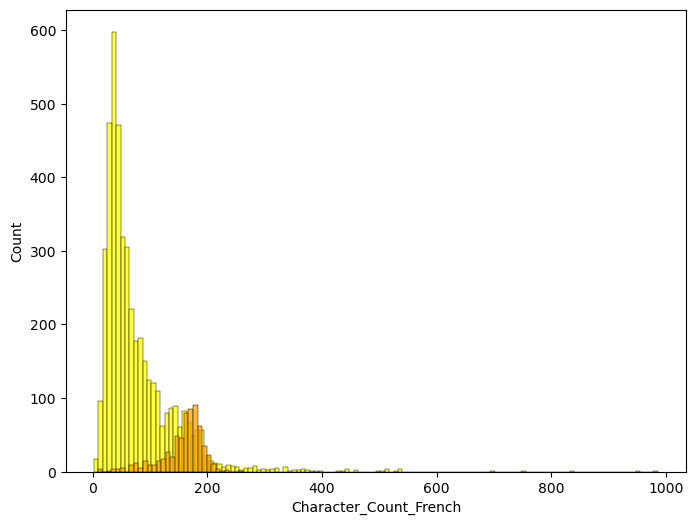

In [255]:
## Histogram plot (Historigramme)
plt.figure(figsize=(8,6))
sns.histplot(data[data['labels']==0]['Character_Count_French'],color = 'yellow')
sns.histplot(data[data['labels']==1]['Character_Count_French'],color = 'orange')

<Axes: xlabel='Word Count', ylabel='Count'>

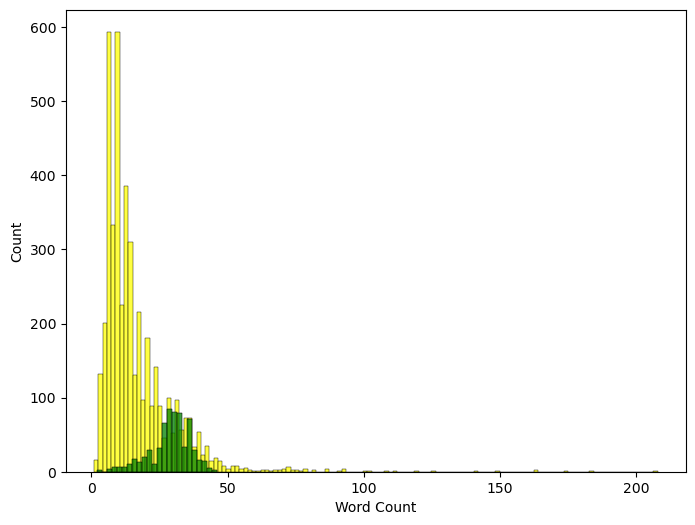

In [256]:
plt.figure(figsize=(8,6))
sns.histplot(data[data['labels']==0]['Word Count'],color = 'yellow')
sns.histplot(data[data['labels']==1]['Word Count'],color = 'green')

<Axes: xlabel='Word Count', ylabel='Count'>

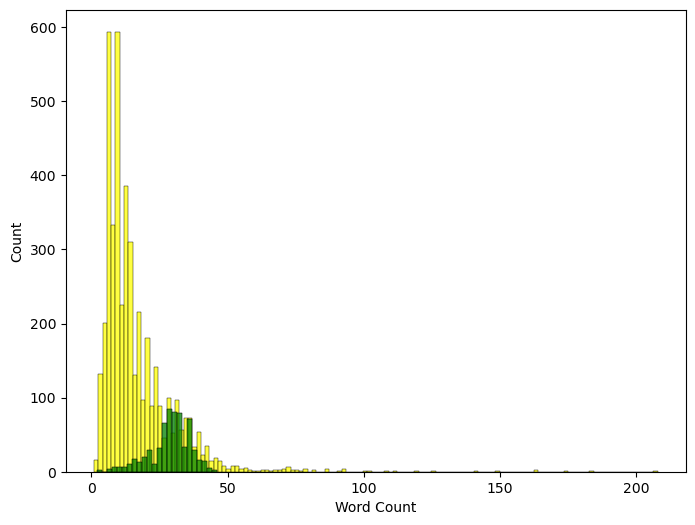

In [257]:
plt.figure(figsize=(8,6))
sns.histplot(data[data['labels']==0]['Word Count'],color = 'yellow')
sns.histplot(data[data['labels']==1]['Word Count'],color = 'green')

<Axes: xlabel='Word Count', ylabel='Count'>

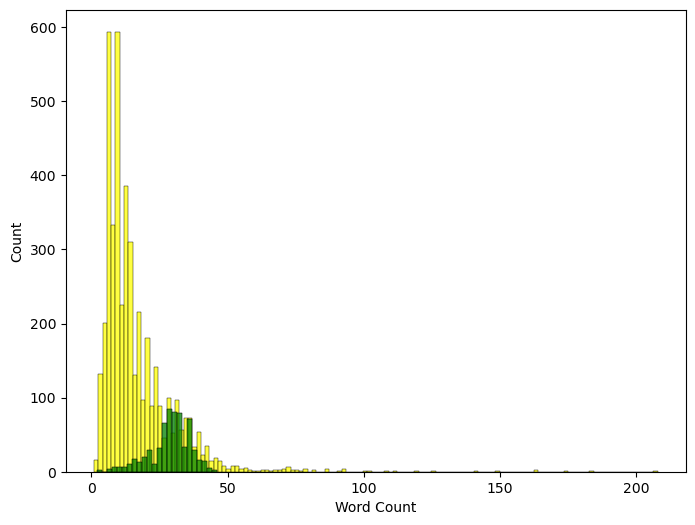

In [258]:
plt.figure(figsize=(8,6))
sns.histplot(data[data['labels']==0]['Word Count'],color = 'yellow')
sns.histplot(data[data['labels']==1]['Word Count'],color = 'green')

<Axes: xlabel='Word Count', ylabel='Count'>

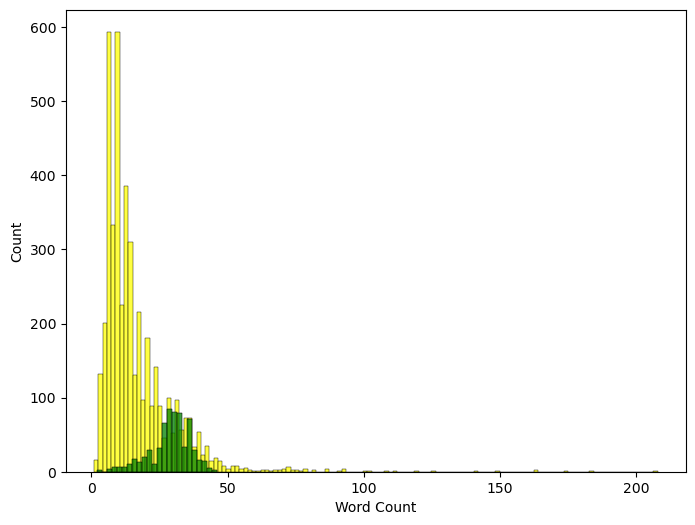

In [259]:
plt.figure(figsize=(8,6))
sns.histplot(data[data['labels']==0]['Word Count'],color = 'yellow')
sns.histplot(data[data['labels']==1]['Word Count'],color = 'green')

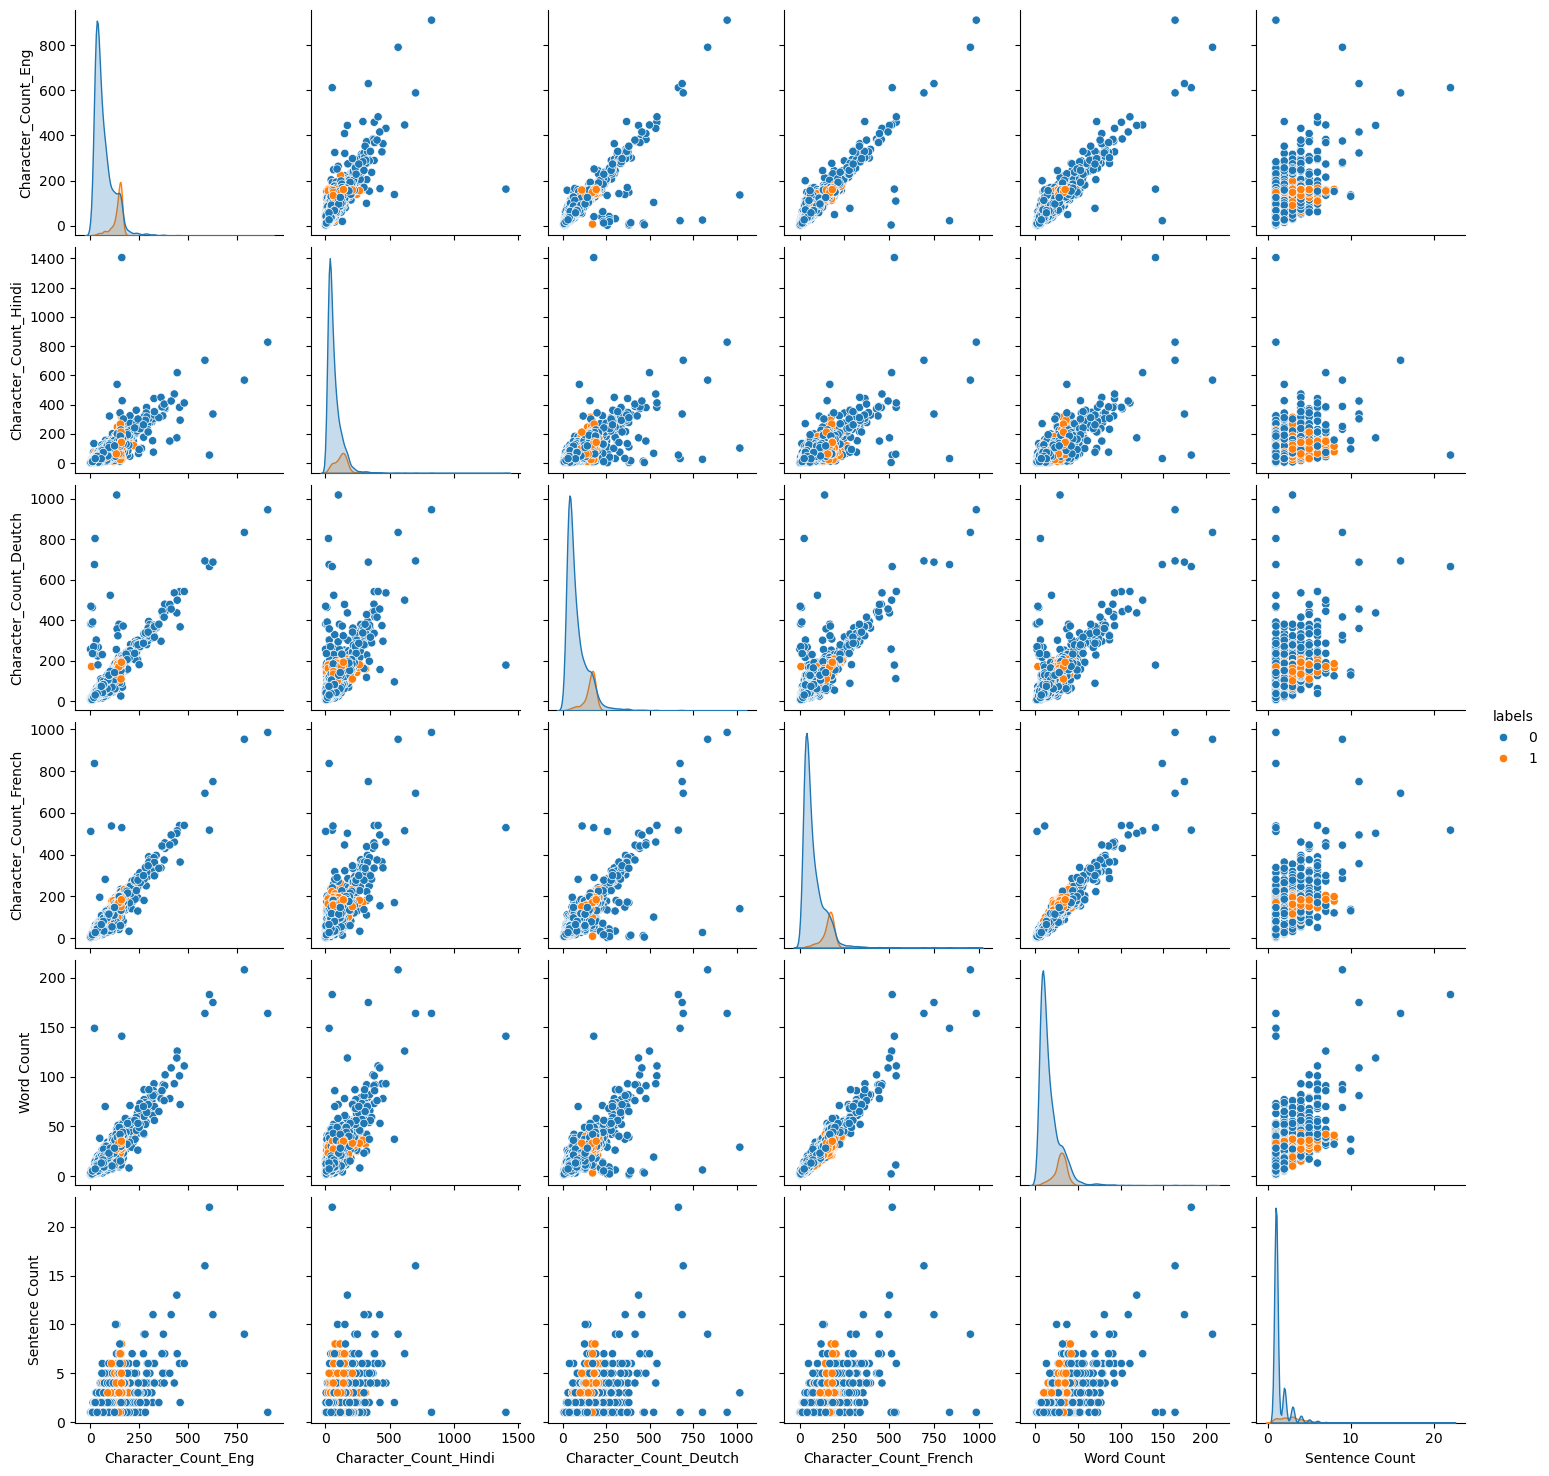

In [260]:
sns.pairplot(data,hue='labels')

In [261]:
columns_to_select = ['labels', 'Character_Count_Hindi', 'Word Count', 'Sentence Count'] # Select only numeric columns
numeric_data = data[columns_to_select]

<Axes: >

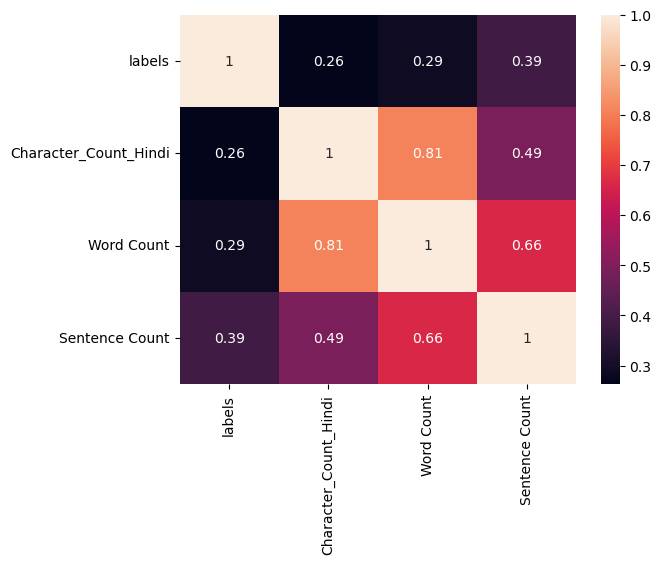

In [262]:
## Heat map plot (Carte Graphique)
sns.heatmap(numeric_data.corr(),annot=True)

In [263]:
columns_to_select = ['labels', 'Character_Count_Deutch', 'Word Count', 'Sentence Count'] # Select only numeric columns
numeric_data = data[columns_to_select]

<Axes: >

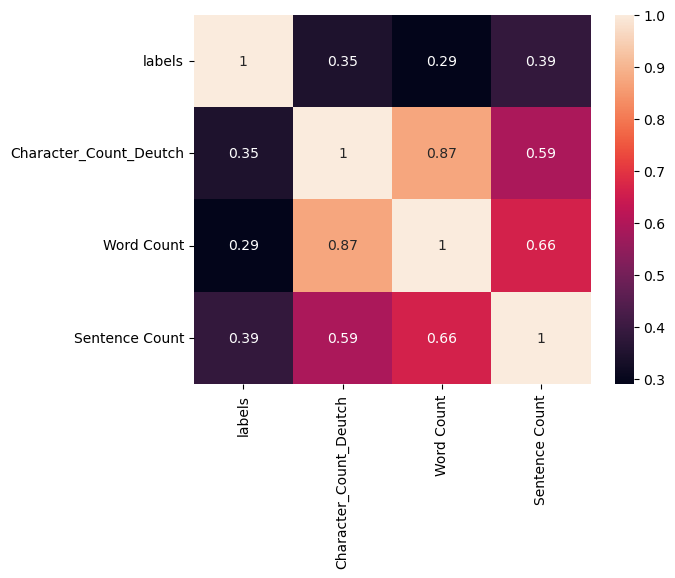

In [264]:
## Heat map plot (Carte Graphique)
sns.heatmap(numeric_data.corr(),annot=True)

In [265]:
columns_to_select = ['labels', 'Character_Count_Eng', 'Word Count', 'Sentence Count'] # Select only numeric columns
numeric_data = data[columns_to_select]

<Axes: >

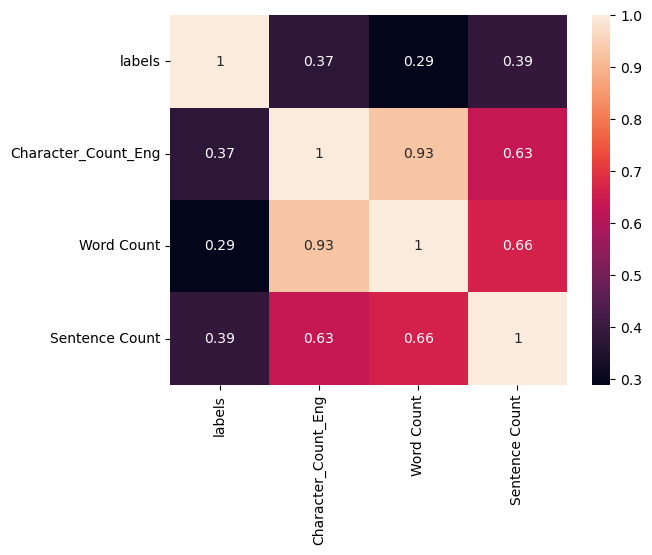

In [266]:
## Heat map plot (Carte Graphique)
sns.heatmap(numeric_data.corr(),annot=True)

In [267]:
columns_to_select = ['labels', 'Character_Count_French', 'Word Count', 'Sentence Count'] # Select only numeric columns
numeric_data = data[columns_to_select]

<Axes: >

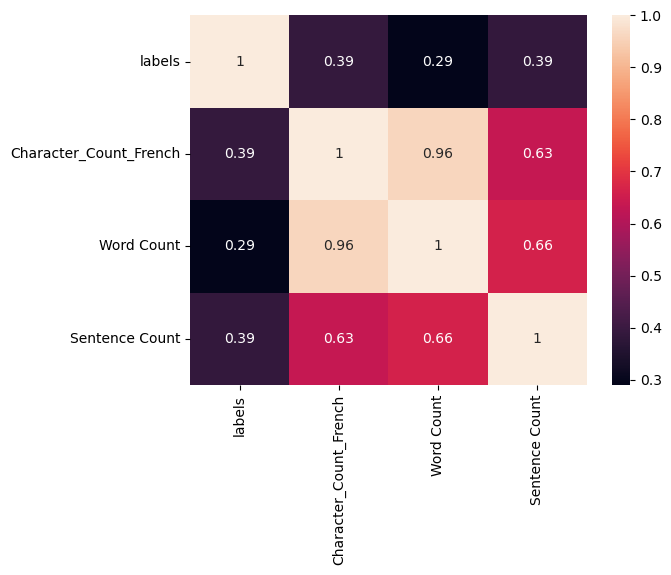

In [268]:
## Heat map plot (Carte Graphique)
sns.heatmap(numeric_data.corr(),annot=True)

In [269]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [270]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [271]:
from nltk.corpus import stopwords
stopwords.words('German')

['aber',
 'alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anderr',
 'anders',
 'auch',
 'auf',
 'aus',
 'bei',
 'bin',
 'bis',
 'bist',
 'da',
 'damit',
 'dann',
 'der',
 'den',
 'des',
 'dem',
 'die',
 'das',
 'dass',
 'daß',
 'derselbe',
 'derselben',
 'denselben',
 'desselben',
 'demselben',
 'dieselbe',
 'dieselben',
 'dasselbe',
 'dazu',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 'deines',
 'denn',
 'derer',
 'dessen',
 'dich',
 'dir',
 'du',
 'dies',
 'diese',
 'diesem',
 'diesen',
 'dieser',
 'dieses',
 'doch',
 'dort',
 'durch',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'eines',
 'einig',
 'einige',
 'einigem',
 'einigen',
 'einiger',
 'einiges',
 'einmal',
 'er',
 'ihn',
 'ihm',
 'es',
 'etwas',
 'euer',
 'eure',
 'eurem',
 'euren',
 'eurer',
 'eures',
 'für',
 'gegen',
 'gewesen',
 'hab',
 'habe',
 'haben',
 'hat',
 'hatte',
 'hatten',
 '

In [272]:
from nltk.corpus import stopwords

french_stopwords = stopwords.words('french')
print(french_stopwords)


['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [273]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [274]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Roaming')

'roam'

In [275]:
def transform_text(text):
    text = text.lower() # 1. Conversion du texte
    text = nltk.word_tokenize(text) # 2. La Tokenization
    
    y=[] # 3. La suppression des caractères spéciaux
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text: # 4. La suppression des stop word et des ponctuations
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:  # 5. Le Stemmimg
        y.append(ps.stem(i))
        
    return " ".join(y)

In [276]:
def transform_text(text):
    text = text.lower() # 1. Conversion du texte
    text = nltk.word_tokenize(text) # 2. La Tokenization
    
    y=[] # 3. Removing special Characters
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text: # 4. Suppression des stop word et des ponctuations
        if i not in stopwords.words('Hindi') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:  # 5. Le Stemmimg
        y.append(ps.stem(i))
        
    return " ".join(y)

In [277]:
def transform_text(text):
    text = text.lower() # 1. Conversion du texte
    text = nltk.word_tokenize(text) # 2. la Tokenization
    
    y=[] # 3. La supresssion des caractères spéciaux
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text: # 4. La suppression des stop word et des ponctuations
        if i not in stopwords.words('Deutch') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:  # 5. Le Stemmimg
        y.append(ps.stem(i))
        
    return " ".join(y)

In [278]:
def transform_text(text):
    text = text.lower() # 1. Conversion du texte
    text = nltk.word_tokenize(text) # 2. la Tokenization
    
    y=[] # 3. Suppression des caractères spéciaux
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text: # 4. Suppresion des stop word et des ponctuations
        if i not in stopwords.words('french') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:  # 5. Le Stemmimg
        y.append(ps.stem(i))
        
    return " ".join(y)

In [279]:
transform_text('ठीक है, अपनी कीमत बताएं जब तक यह कानूनी है! मैं उन्हें कब ले सकता हूं? आपके पास x एम्स xx क्यों हैं?')

'जब तक यह कब x xx'

In [280]:
data['Mail-Text-Hindi'][100]

'मेरे पास और कुछ नहीं है.'

In [281]:
data['Transformed-Text'] = data['Mail-Text-Hindi'].apply(transform_text)

data[['labels', 'Mail-Text-Hindi', 'Character_Count_Hindi', 'Word Count', 'Sentence Count', 'Transformed-Text']].head(4)


labels                                    Mail-Text-Hindi  \
0       0  Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान वि...   
1       0                         ओके लामर.... if if uue पर.   
2       1  Fktatatat 21 मई को प्राप्त करने के लिए मुफ्त प...   
3       0  Uden इतना जल्दी कहते हैं... तो पहले से ही यूसी...   

   Character_Count_Hindi  Word Count  Sentence Count  \
0                     96          27               1   
1                     26          10               1   
2                    170          38               2   
3                     58          13               1   

                                    Transformed-Text  
0                       dakag तक bag non cag एक wack  
1                                       if if uue पर  
2  fktatatat 21 मई fao 87121 stibook दर ttverv 0 ...  
3                                               uden

In [282]:
transform_text('Okay, nennen Sie Ihren Preis, solange er legal ist! Wann kann ich sie abholen? Warum haben Sie x ams xx?')

'okay nennen sie ihren prei solang er legal ist wann kann ich sie abholen warum haben sie x am xx'

In [283]:
data['Mail-Text-Deutch'][100]

'Bitte sims mir nicht mehr. Ich habe nichts anderes zu sagen.'

In [284]:
data['Transformed-Text'] = data['Mail-Text-Deutch'].apply(transform_text)

data[['labels', 'Mail-Text-Deutch', 'Character_Count_Deutch', 'Word Count', 'Sentence Count', 'Transformed-Text']].head(4)


labels                                   Mail-Text-Deutch  \
0       0  Gehen Sie bis jurong Punkt, verrückt.. Verfügb...   
1       0                      Ok Lar... joking wif u oni...   
2       1  Freier Eintritt in 2 a wkly comp zum Gewinn FA...   
3       0     U dun sagen so früh... U c schon dann sagen...   

   Character_Count_Deutch  Word Count  Sentence Count  \
0                     119          27               1   
1                      29          10               1   
2                     169          38               2   
3                      46          13               1   

                                    Transformed-Text  
0  gehen sie bi jurong punkt verrückt verfügbar n...  
1                              ok lar joke wif u oni  
2  freier eintritt in 2 a wkli comp zum gewinn fa...  
3             u dun sagen so früh u schon dann sagen

In [285]:
transform_text('Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx')

'okay name ur price long it legal wen can i pick them up u ave x am xx'

In [286]:
data['Mail-Text-Eng'][100]

"Please don't text me anymore. I have nothing else to say."

In [287]:
data['Transformed-Text'] = data['Mail-Text-Eng'].apply(transform_text)

data[['labels', 'Mail-Text-Eng', 'Character_Count_Eng', 'Word Count', 'Sentence Count', 'Transformed-Text']].head(4)


labels                                      Mail-Text-Eng  \
0       0  Go until jurong point, crazy.. Available only ...   
1       0                      Ok lar... Joking wif u oni...   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...   
3       0  U dun say so early hor... U c already then say...   

   Character_Count_Eng  Word Count  Sentence Count  \
0                  111          27               1   
1                   29          10               1   
2                  155          38               2   
3                   49          13               1   

                                    Transformed-Text  
0  go until jurong point crazi avail onli in bugi...  
1                              ok lar joke wif u oni  
2  free entri in 2 a wkli comp to win fa cup fina...  
3          u dun say so earli hor u alreadi then say

In [288]:
transform_text("D'accord, nommez votre prix tant que c'est légal ! Quand puis-je les récupérer ? Pourquoi avez-vous x ams xx ?")

'nommez prix tant légal quand récupérer pourquoi x am xx'

In [289]:
data['Mail-Text-French'][100]

"Ne m'envoie plus de SMS, je n'ai rien d'autre à dire."

In [290]:
data['Transformed-Text'] = data['Mail-Text-French'].apply(transform_text)

data[['labels', 'Mail-Text-French', 'Character_Count_French', 'Word Count', 'Sentence Count', 'Transformed-Text']].head(4)


labels                                   Mail-Text-French  \
0       0  Allez jusqu'à Jurong point, fou.. Disponible s...   
1       0           J'ai fait une blague sur le wif u oni...   
2       1  Entrée libre dans 2 a wkly comp pour gagner FA...   
3       0     U dun dit si tôt hor... U c déjà dire alors...   

   Character_Count_French  Word Count  Sentence Count  \
0                     117          27               1   
1                      40          10               1   
2                     175          38               2   
3                      46          13               1   

                                    Transformed-Text  
0  allez jusqu jurong point fou dispon seulement ...  
1                               fait blagu wif u oni  
2  entré libr 2 a wkli comp gagner fa cup final t...  
3              u dun dit si tôt hor u déjà dire alor

# World Cloud

In [291]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [292]:

# Création d'un objet WordCloud
from wordcloud import WordCloud
wc = WordCloud(width=1500,height=800,min_font_size=10,background_color='white')

In [293]:
# Générer un nuage de mots pour les messages spam en français
spam_wc = wc.generate(data[data['labels']==1]['Transformed-Text'].str.cat(sep=" "))

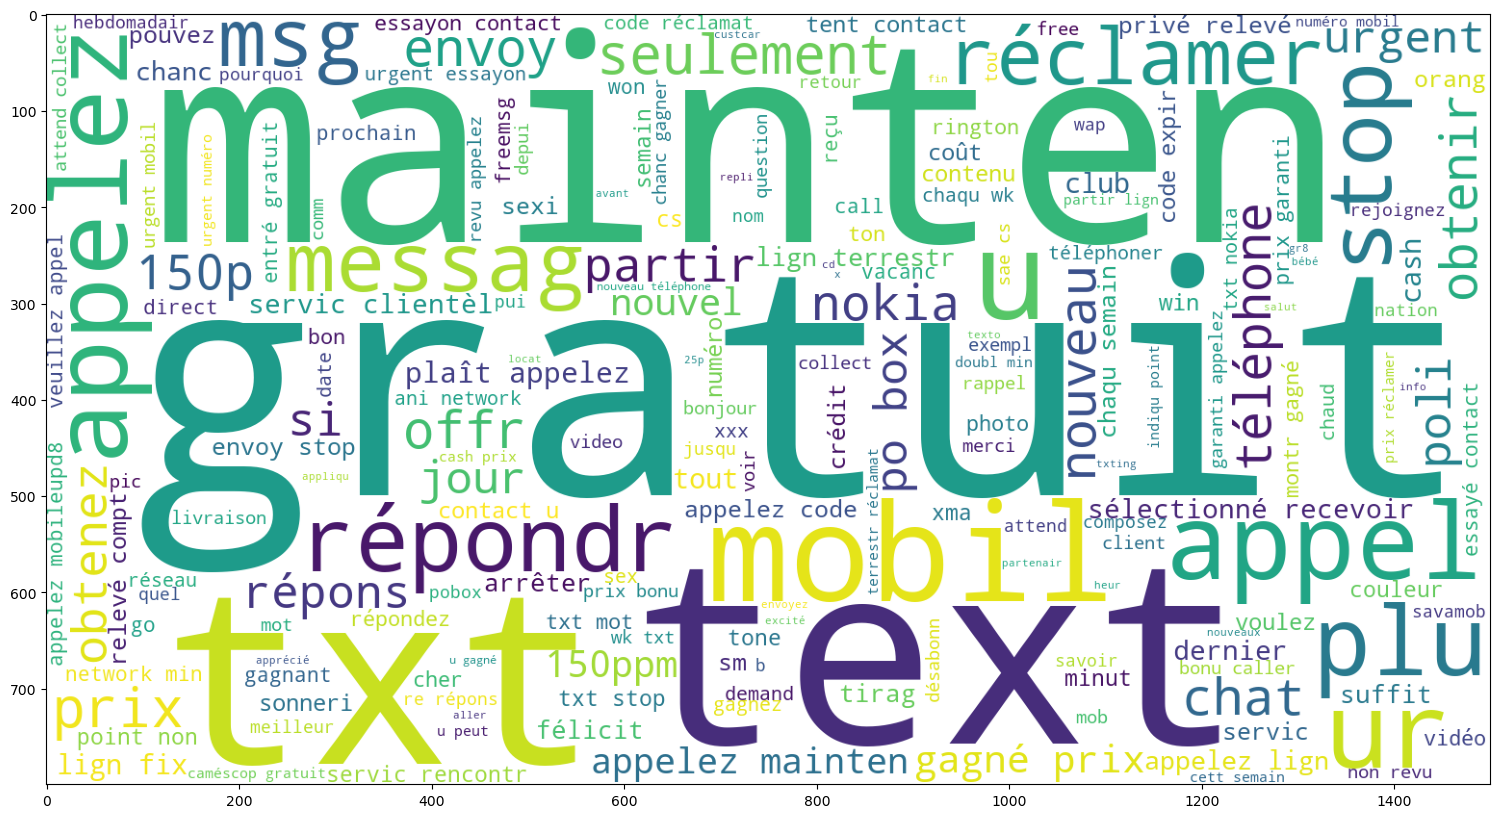

In [294]:
# Affichage le nuage de mots pour les messages spam en français
plt.figure(figsize=(20,10))
plt.imshow(spam_wc)

In [295]:
# Générer un nuage de mots pour les messages non-spam en français
non_spam_wc = wc.generate(data[data['labels']==0]['Transformed-Text'].str.cat(sep=" "))

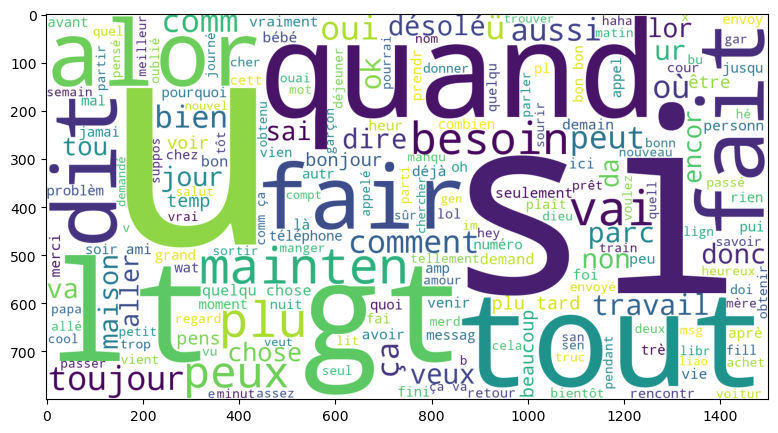

In [296]:
# Affichage le nuage de mots pour les messages non-spam en français
plt.figure(figsize=(12,5))
plt.imshow(non_spam_wc)

In [297]:
# Extraire les mots des messages spam en français
spam_word = []
for msg in data[data['labels']==1]['Transformed-Text'].tolist():
    for word in msg.split():
        spam_word.append(word)

In [298]:
len(spam_word)

10196

In [299]:
# Comptage la fréquence des mots dans les messages spam en français
from collections import Counter
Counter(spam_word)

Counter({'gratuit': 179,
         'appelez': 171,
         '2': 155,
         'mainten': 145,
         'txt': 138,
         'text': 110,
         'mobil': 107,
         'u': 103,
         'prix': 100,
         '4': 94,
         'a': 84,
         'ur': 82,
         'stop': 80,
         'appel': 76,
         'servic': 62,
         'plu': 58,
         'seulement': 57,
         'urgent': 54,
         'nokia': 54,
         'lign': 50,
         'contact': 49,
         'envoy': 48,
         'semain': 46,
         'répondr': 45,
         'messag': 43,
         'téléphone': 43,
         'réclamer': 41,
         'si': 41,
         'répons': 41,
         'nouveau': 41,
         'to': 35,
         'numéro': 35,
         'min': 35,
         'cash': 34,
         'gagné': 34,
         'msg': 34,
         'jour': 33,
         'garanti': 33,
         'collect': 33,
         'réclamat': 32,
         'chanc': 32,
         'partir': 32,
         'just': 32,
         'cs': 29,
         'tout': 29,
        

In [300]:
# Affichage les 30 mots les plus courants parmi les messages spam en Français
pd.DataFrame(Counter(spam_word).most_common(30))

0    1
0     gratuit  179
1     appelez  171
2           2  155
3     mainten  145
4         txt  138
5        text  110
6       mobil  107
7           u  103
8        prix  100
9           4   94
10          a   84
11         ur   82
12       stop   80
13      appel   76
14     servic   62
15        plu   58
16  seulement   57
17     urgent   54
18      nokia   54
19       lign   50
20    contact   49
21      envoy   48
22     semain   46
23    répondr   45
24     messag   43
25  téléphone   43
26   réclamer   41
27         si   41
28     répons   41
29    nouveau   41

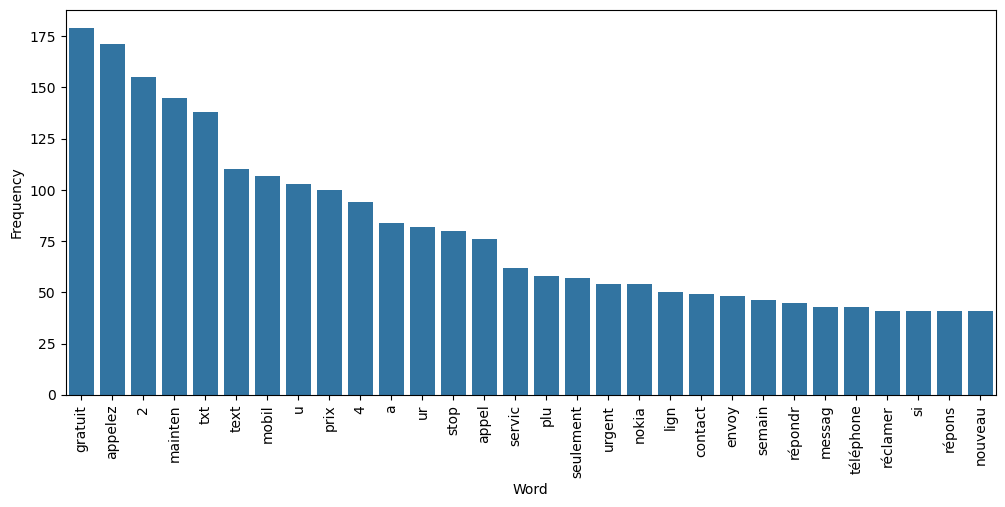

In [301]:
data_frame = pd.DataFrame(Counter(spam_word).most_common(30), columns=['Word', 'Frequency'])
plt.figure(figsize=(12, 5))
sns.barplot(x='Word', y='Frequency', data=data_frame)
plt.xticks(rotation='vertical')
plt.show()

In [302]:
non_spam_word = []
for msg in data[data['labels']==0]['Transformed-Text'].tolist():
    for word in msg.split():
        non_spam_word.append(word)

In [303]:
len(non_spam_word)

34094

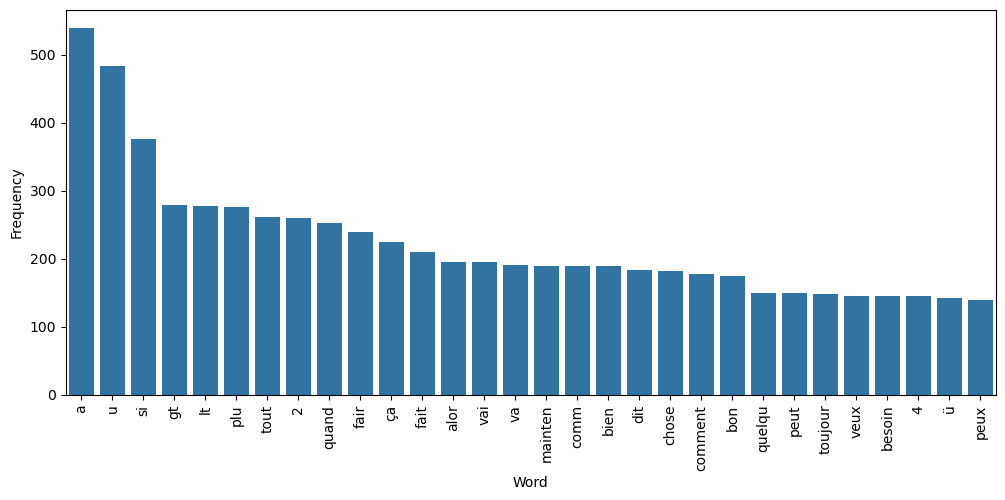

In [304]:
data_frame = pd.DataFrame(Counter(non_spam_word).most_common(30), columns=['Word', 'Frequency'])
plt.figure(figsize=(12, 5))
sns.barplot(x='Word', y='Frequency', data=data_frame)
plt.xticks(rotation='vertical')
plt.show()

In [305]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

In [306]:
# Création d'un objet WordCloud en Anglais
wc = WordCloud(width=1500, height=800, min_font_size=10, background_color='white')

In [307]:
# Générer un nuage de mots pour les messages spam en Anglais
spam_wc = wc.generate(data[data['labels'] == 1]['Mail-Text-Eng'].str.cat(sep=" "))

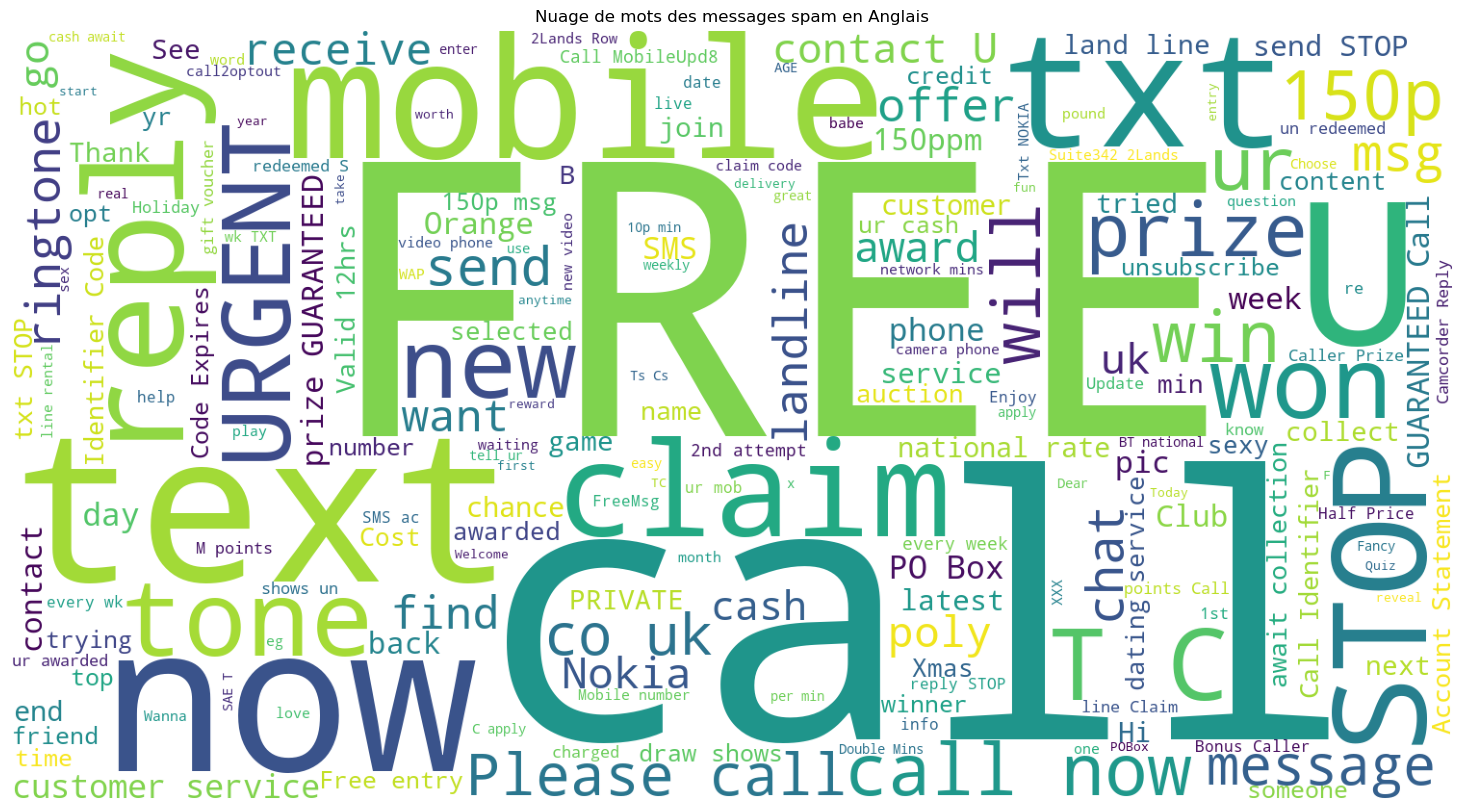

In [308]:
# Affichage le nuage de mots pour les messages spam en Anglais
plt.figure(figsize=(20,10))
plt.imshow(spam_wc)
plt.title('Nuage de mots des messages spam en Anglais')
plt.axis('off')
plt.show()

In [309]:
# Générer un nuage de mots pour les messages non-spam en Anglais
non_spam_wc = wc.generate(data[data['labels'] == 0]['Mail-Text-Eng'].str.cat(sep=" "))


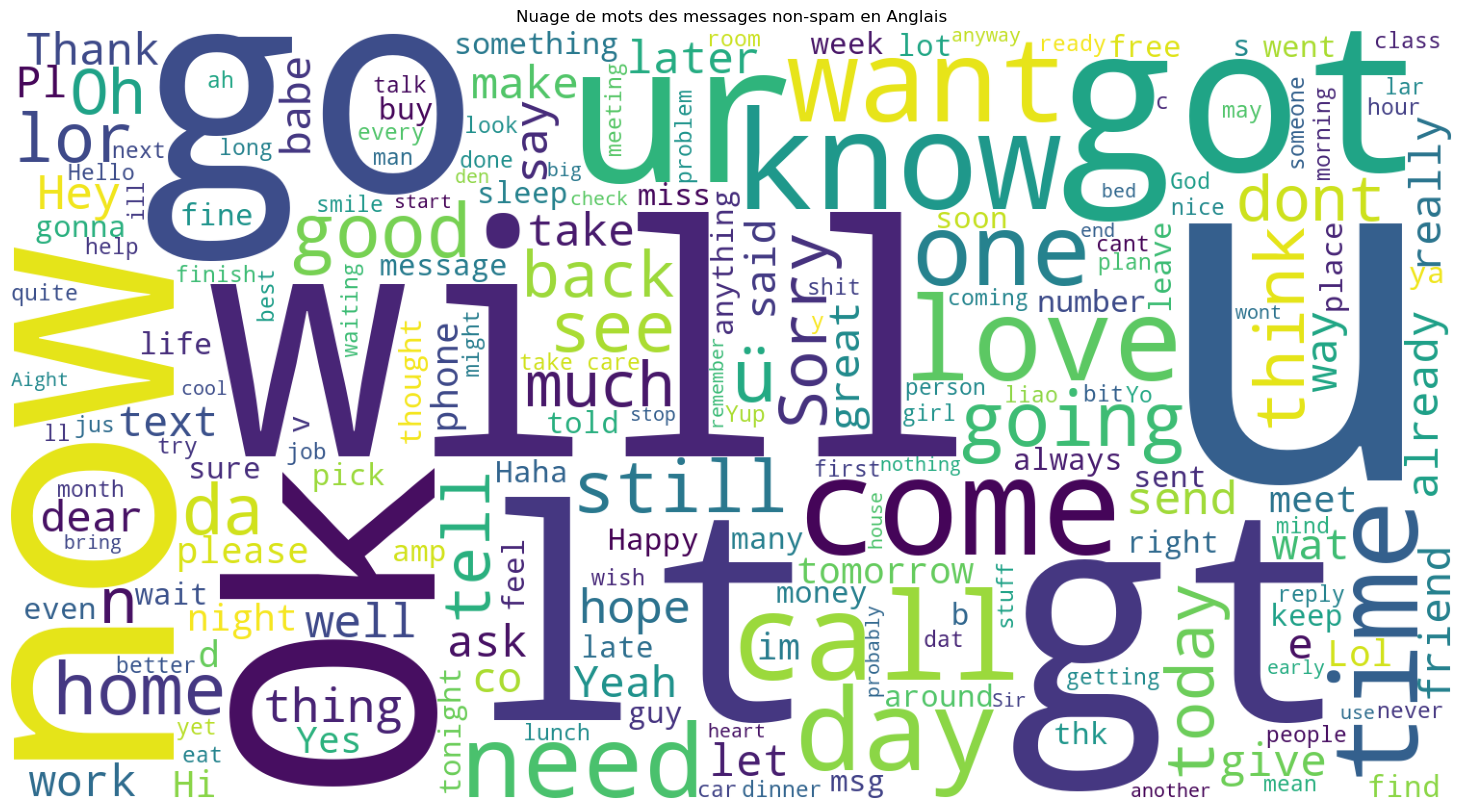

In [310]:
# Affichage le nuage de mots pour les messages non-spam en Anglais
plt.figure(figsize=(20,10))
plt.imshow(non_spam_wc)
plt.title('Nuage de mots des messages non-spam en Anglais')
plt.axis('off')
plt.show()

In [311]:
# Extraire les mots des messages spam en Anglais
spam_words = []
for msg in data[data['labels'] == 1]['Mail-Text-Eng'].tolist():
    for words in msg.split():
        spam_words.append(words)

In [312]:
len(spam_words)

15166

In [313]:
# Compter la fréquence des mots dans les messages spam en Anglais

Counter(spam_words)


Counter({'to': 510,
         'a': 308,
         'your': 167,
         'call': 157,
         'the': 157,
         'or': 154,
         '2': 150,
         'for': 150,
         'you': 145,
         'is': 125,
         'Call': 114,
         'on': 112,
         'have': 107,
         'from': 107,
         'and': 102,
         '&': 88,
         'ur': 86,
         'with': 85,
         'of': 78,
         '4': 74,
         'FREE': 73,
         'mobile': 68,
         'You': 65,
         'are': 65,
         'our': 64,
         'Your': 64,
         'To': 63,
         'claim': 62,
         'text': 61,
         'U': 58,
         'now': 56,
         'Txt': 54,
         'reply': 54,
         'in': 53,
         'txt': 53,
         'free': 52,
         '-': 48,
         'contact': 48,
         'just': 42,
         'be': 41,
         'this': 41,
         'send': 40,
         'STOP': 40,
         'new': 39,
         'Reply': 38,
         'get': 38,
         'per': 38,
         'been': 37,
         'prize': 

In [314]:
# Affichage des 30 mots les plus courants parmi les messages spam en Anglais
pd.DataFrame(Counter(spam_words).most_common(30))


0    1
0       to  510
1        a  308
2     your  167
3     call  157
4      the  157
5       or  154
6        2  150
7      for  150
8      you  145
9       is  125
10    Call  114
11      on  112
12    have  107
13    from  107
14     and  102
15       &   88
16      ur   86
17    with   85
18      of   78
19       4   74
20    FREE   73
21  mobile   68
22     You   65
23     are   65
24     our   64
25    Your   64
26      To   63
27   claim   62
28    text   61
29       U   58

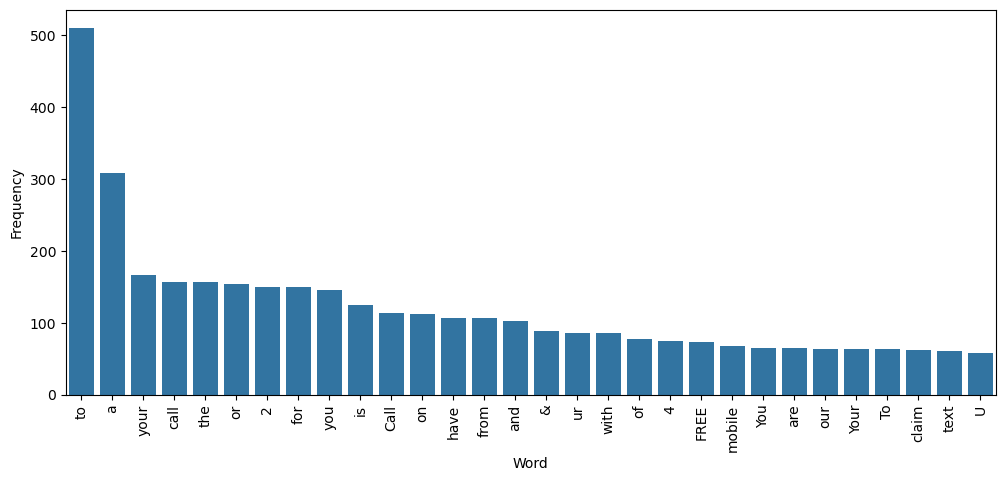

In [315]:
data_frame = pd.DataFrame(Counter(spam_words).most_common(30), columns=['Word', 'Frequency'])
plt.figure(figsize=(12, 5))
sns.barplot(x='Word', y='Frequency', data=data_frame)
plt.xticks(rotation='vertical')
plt.show()

In [316]:
non_spam_words = []
for msg in data[data['labels']==0]['Transformed-Text'].tolist():
    for word in msg.split():
        non_spam_words.append(word)

In [317]:
len(non_spam_words)

34094

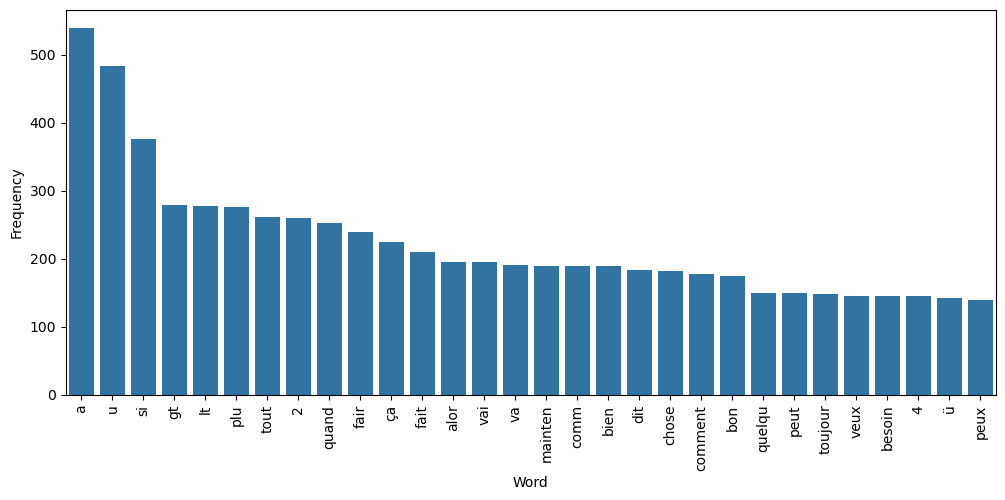

In [318]:
data_frame = pd.DataFrame(Counter(non_spam_words).most_common(30), columns=['Word', 'Frequency'])
plt.figure(figsize=(12, 5))
sns.barplot(x='Word', y='Frequency', data=data_frame)
plt.xticks(rotation='vertical')
plt.show()

# 4. CREATION DU MODELE

In [319]:
data.head()

labels                                      Mail-Text-Eng  \
0       0  Go until jurong point, crazy.. Available only ...   
1       0                      Ok lar... Joking wif u oni...   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...   
3       0  U dun say so early hor... U c already then say...   
4       0  Nah I don't think he goes to usf, he lives aro...   

                                     Mail-Text-Hindi  \
0  Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान वि...   
1                         ओके लामर.... if if uue पर.   
2  Fktatatat 21 मई को प्राप्त करने के लिए मुफ्त प...   
3  Uden इतना जल्दी कहते हैं... तो पहले से ही यूसी...   
4  नहीं, मुझे नहीं लगता कि वह हमारे लिए चला जाता ...   

                                    Mail-Text-Deutch  \
0  Gehen Sie bis jurong Punkt, verrückt.. Verfügb...   
1                      Ok Lar... joking wif u oni...   
2  Freier Eintritt in 2 a wkly comp zum Gewinn FA...   
3     U dun sagen so früh... U c schon dann sagen...   
4  Nein, ich glaube nicht, dass er zu unsf geht, ...   

                                    Mail-Text-French  Character_Count_Eng  \
0  Allez jusqu'à Jurong point, fou.. Disponible s...                  111   
1           J'ai fait une blague sur le wif u oni...                   29   
2  Entrée libre dans 2 a wkly comp pour gagner FA...                  155   
3     U dun dit si tôt hor... U c déjà dire alors...                   49   
4  Non, je ne pense pas qu'il va à usf, il vit da...                   61   

   Character_Count_Hindi  Character_Count_Deutch  Character_Count_French  \
0                     96                     119                     117   
1                     26                      29                      40   
2                    170                     169                     175   
3                     58                      46                      46   
4                     82                      71                      57   

   Word Count  Sentence Count  \
0          27               1   
1          10               1   
2          38               2   
3          13               1   
4          17               1   

                                    Transformed-Text  
0  allez jusqu jurong point fou dispon seulement ...  
1                               fait blagu wif u oni  
2  entré libr 2 a wkli comp gagner fa cup final t...  
3              u dun dit si tôt hor u déjà dire alor  
4                           non pens va usf vit coin

# Utilisation d'un compteur de vecteurs

In [320]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [321]:
A = cv.fit_transform(data['Transformed-Text']).toarray()

In [322]:
A.shape

(5157, 7709)

In [323]:
b = data['labels'].values

In [324]:
b

array([0, 0, 1, ..., 0, 0, 0])

In [325]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [326]:
A_train,A_test,b_train,b_test = train_test_split(A,b,test_size=0.2,random_state=2)

In [327]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [328]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [329]:
gnb.fit(A_train,b_train)
b_pred1 = gnb.predict(A_test)
print(accuracy_score(b_test,b_pred1))
print(confusion_matrix(b_test,b_pred1))
print(precision_score(b_test,b_pred1))

0.8246124031007752
[[740 165]
 [ 16 111]]
0.40217391304347827


In [330]:
mnb.fit(A_train,b_train)
b_pred2 = mnb.predict(A_test)
print(accuracy_score(b_test,b_pred2))
print(confusion_matrix(b_test,b_pred2))
print(precision_score(b_test,b_pred2))

0.9767441860465116
[[889  16]
 [  8 119]]
0.8814814814814815


In [331]:
bnb.fit(A_train,b_train)
b_pred3 = bnb.predict(A_test)
print(accuracy_score(b_test,b_pred3))
print(confusion_matrix(b_test,b_pred3))
print(precision_score(b_test,b_pred3))

0.9709302325581395
[[898   7]
 [ 23 104]]
0.9369369369369369


# Utilisation du vectoriseur TF-IDF

In [332]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [333]:
X = tfidf.fit_transform(data['Transformed-Text']).toarray()

In [334]:
y = data['labels'].values

In [335]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [336]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8197674418604651
[[741 164]
 [ 22 105]]
0.3903345724907063


In [337]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9602713178294574
[[905   0]
 [ 41  86]]
1.0


In [338]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9709302325581395
[[898   7]
 [ 23 104]]
0.9369369369369369


# Modèle sélectionné - Tfidf ------->> MultinomialNB

In [339]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [340]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [341]:
lr = LogisticRegression(solver='liblinear', penalty='l1')
sv = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dct = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(n_estimators=50, random_state=2)
ab = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gb = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [342]:
# Initialisation et entraînement du modèle

models = {
    'Logistic Regression': lr,
    'SVC': sv,
    'MultinomialNB': mnb,
    'DecisionTreeClassifier': dct,
    'KNN': knn,
    'RF': rf,
    'AdaBoost': ab,
    'Bagging': bc,
    'Extra Tree': etc,
    'GradientBoosting': gb,
    'XGBoost': xgb
}

In [343]:
def train_classifier(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [344]:
train_classifier(lr,X_train, X_test, y_train, y_test)

(0.9554263565891473, 0.9764705882352941)

In [345]:
accuracy_scores = []
precision_scores = []
for name, model in models.items():
    current_accuracy, current_precision = train_classifier(model, X_train, X_test, y_train, y_test)
    # print(f'{name} - Accuracy: {current_accuracy:.4f} & Precision: {current_precision:.4f}')
    print("For",name)
    print("Accuracy:",current_accuracy)
    print("Precision:",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For Logistic Regression
Accuracy: 0.9554263565891473
Precision: 0.9764705882352941
For SVC
Accuracy: 0.9757751937984496
Precision: 0.9903846153846154
For MultinomialNB
Accuracy: 0.9602713178294574
Precision: 1.0
For DecisionTreeClassifier
Accuracy: 0.9525193798449613
Precision: 0.9431818181818182
For KNN
Accuracy: 0.8982558139534884
Precision: 1.0
For RF
Accuracy: 0.9670542635658915
Precision: 0.9894736842105263


C:\Users\PC\miniconda3\envs\Email_Spam\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy: 0.9583333333333334
Precision: 0.9117647058823529
For Bagging
Accuracy: 0.9641472868217055
Precision: 0.9166666666666666
For Extra Tree
Accuracy: 0.9748062015503876
Precision: 0.9719626168224299
For GradientBoosting
Accuracy: 0.9534883720930233
Precision: 0.9759036144578314
For XGBoost
Accuracy: 0.9612403100775194
Precision: 0.9393939393939394


In [350]:
print(len(models.keys()))
print(len(accuracy_scores))
print(len(precision_scores))


11
0
0


In [352]:
import pandas as pd

# Initialisation des modèles
models = {
    'Logistic Regression': 'logistic_regression_model',
    'SVC': 'svc_model',
    'MultinomialNB': 'multinomialnb_model',
    'DecisionTreeClassifier': 'decision_tree_model',
    'KNN': 'knn_model',
    'RF': 'rf_model',
    'AdaBoost': 'adaboost_model',
    'Bagging': 'bagging_model',
    'Extra Tree': 'extra_tree_model',
    'GradientBoosting': 'gradient_boosting_model',
    'XGBoost': 'xgboost_model'
}

# Initialisation des listes de scores
accuracy_scores = []
precision_scores = []

# Ajout des scores calculés manuellement pour chaque modèle
accuracy_scores.extend([
    0.9554263565891473,  # Logistic Regression
    0.9757751937984496,  # SVC
    0.9602713178294574,  # MultinomialNB
    0.9525193798449613,  # DecisionTreeClassifier
    0.8982558139534884,  # KNN
    0.9670542635658915,  # RF
    0.9583333333333334,  # AdaBoost
    0.9641472868217055,  # Bagging
    0.9748062015503876,  # Extra Tree
    0.9534883720930233,  # GradientBoosting
    0.9612403100775194   # XGBoost
])

precision_scores.extend([
    0.9764705882352941,  # Logistic Regression
    0.9903846153846154,  # SVC
    1.0,                 # MultinomialNB
    0.9431818181818182,  # DecisionTreeClassifier
    1.0,                 # KNN
    0.9894736842105263,  # RF
    0.9117647058823529,  # AdaBoost
    0.9166666666666666,  # Bagging
    0.9719626168224299,  # Extra Tree
    0.9759036144578314,  # GradientBoosting
    0.9393939393939394   # XGBoost
])

# Vérification les longueurs des listes
print(f"Longueur de models.keys(): {len(models.keys())}")
print(f"Longueur de accuracy_scores: {len(accuracy_scores)}")
print(f"Longueur de precision_scores: {len(precision_scores)}")

# Création le DataFrame uniquement si les longueurs correspondent
if len(models.keys()) == len(accuracy_scores) == len(precision_scores):
    result_df = pd.DataFrame({
        'Algorithm': list(models.keys()),
        'Accuracy': accuracy_scores,
        'Precision': precision_scores
    }).sort_values('Precision', ascending=False)

    print(result_df)
else:
    print("Les longueurs des listes ne correspondent pas.")


Longueur de models.keys(): 11
Longueur de accuracy_scores: 11
Longueur de precision_scores: 11
                 Algorithm  Accuracy  Precision
2            MultinomialNB  0.960271   1.000000
4                      KNN  0.898256   1.000000
1                      SVC  0.975775   0.990385
5                       RF  0.967054   0.989474
0      Logistic Regression  0.955426   0.976471
9         GradientBoosting  0.953488   0.975904
8               Extra Tree  0.974806   0.971963
3   DecisionTreeClassifier  0.952519   0.943182
10                 XGBoost  0.961240   0.939394
7                  Bagging  0.964147   0.916667
6                 AdaBoost  0.958333   0.911765


In [353]:
result_df

Algorithm  Accuracy  Precision
2            MultinomialNB  0.960271   1.000000
4                      KNN  0.898256   1.000000
1                      SVC  0.975775   0.990385
5                       RF  0.967054   0.989474
0      Logistic Regression  0.955426   0.976471
9         GradientBoosting  0.953488   0.975904
8               Extra Tree  0.974806   0.971963
3   DecisionTreeClassifier  0.952519   0.943182
10                 XGBoost  0.961240   0.939394
7                  Bagging  0.964147   0.916667
6                 AdaBoost  0.958333   0.911765

In [354]:
result_df1 = pd.melt(result_df,id_vars = "Algorithm")

In [355]:
result_df1

Algorithm   variable     value
0            MultinomialNB   Accuracy  0.960271
1                      KNN   Accuracy  0.898256
2                      SVC   Accuracy  0.975775
3                       RF   Accuracy  0.967054
4      Logistic Regression   Accuracy  0.955426
5         GradientBoosting   Accuracy  0.953488
6               Extra Tree   Accuracy  0.974806
7   DecisionTreeClassifier   Accuracy  0.952519
8                  XGBoost   Accuracy  0.961240
9                  Bagging   Accuracy  0.964147
10                AdaBoost   Accuracy  0.958333
11           MultinomialNB  Precision  1.000000
12                     KNN  Precision  1.000000
13                     SVC  Precision  0.990385
14                      RF  Precision  0.989474
15     Logistic Regression  Precision  0.976471
16        GradientBoosting  Precision  0.975904
17              Extra Tree  Precision  0.971963
18  DecisionTreeClassifier  Precision  0.943182
19                 XGBoost  Precision  0.939394
20                 Bagging  Precision  0.916667
21                AdaBoost  Precision  0.911765

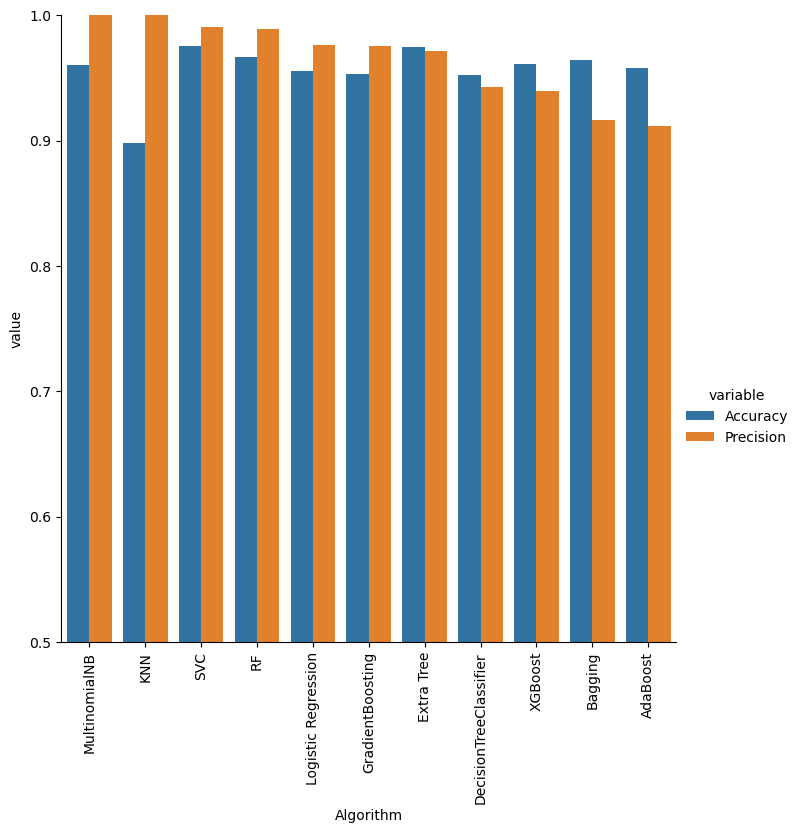

In [356]:
sns.catplot(x='Algorithm', y='value', hue='variable', data=result_df1, kind='bar', height=7)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

# Amélioration du modèle
Changement du paramètre max_feature de Tfidf

In [357]:
tfidf = TfidfVectorizer(max_features=3000)

In [358]:
X = tfidf.fit_transform(data['Transformed-Text']).toarray()
y = data['labels'].values

In [359]:
"""
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
"""

'\nfrom sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\nX = scaler.fit_transform(X)\n'

In [360]:
X = np.hstack((X,data['Character_Count_Eng'].values.reshape(-1,1)))

In [361]:
X = np.hstack((X,data['Character_Count_Deutch'].values.reshape(-1,1)))

In [362]:
X = np.hstack((X,data['Character_Count_Hindi'].values.reshape(-1,1)))

In [363]:
X = np.hstack((X,data['Character_Count_French'].values.reshape(-1,1)))

In [364]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [365]:
lr = LogisticRegression(solver='liblinear', penalty='l1')
sv = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dct = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(n_estimators=50, random_state=2)
ab = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gb = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [366]:
#Entrainement initial du modèle

models = {
    'Logistic Regression': lr,
    'SVC': sv,
    'MultinomialNB': mnb,
    'DecisionTreeClassifier': dct,
    'KNN': knn,
    'RF': rf,
    'AdaBoost': ab,
    'Bagging': bc,
    'Extra Tree': etc,
    'GradientBoosting': gb,
    'XGBoost': xgb
}

In [367]:
def train_classifier(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [368]:
train_classifier(lr,X_train, X_test, y_train, y_test)

(0.9602713178294574, 0.9777777777777777)

In [369]:
accuracy_scores = []
precision_scores = []
for name, model in models.items():
    current_accuracy, current_precision = train_classifier(model, X_train, X_test, y_train, y_test)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\Users\PC\miniconda3\envs\Email_Spam\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PC\miniconda3\envs\Email_Spam\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [375]:
temp_df = pd.DataFrame({'Algorithm': models.keys(),'Accuracy_on_Scaling':accuracy_scores,'Precision_on_Scaling':precision_scores})

In [376]:
result_df2 = result_df.merge(temp_df,on='Algorithm')

In [377]:
temp_df2 = pd.DataFrame({'Algorithm': models.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [378]:
result_df3 = result_df2.merge(temp_df2,on='Algorithm')

In [379]:
temp_df3 = pd.DataFrame({'Algorithm': models.keys(),'Accuracy_Charcter_count':accuracy_scores,'Precision_Charcter_count':precision_scores})

In [380]:
result_df4 = result_df3.merge(temp_df3,on='Algorithm')

In [381]:
result_df4

Algorithm  Accuracy  Precision  Accuracy_on_Scaling  \
0            MultinomialNB  0.960271   1.000000             0.906008   
1                      KNN  0.898256   1.000000             0.896318   
2                      SVC  0.975775   0.990385             0.876938   
3                       RF  0.967054   0.989474             0.975775   
4      Logistic Regression  0.955426   0.976471             0.960271   
5         GradientBoosting  0.953488   0.975904             0.955426   
6               Extra Tree  0.974806   0.971963             0.978682   
7   DecisionTreeClassifier  0.952519   0.943182             0.942829   
8                  XGBoost  0.961240   0.939394             0.974806   
9                  Bagging  0.964147   0.916667             0.970930   
10                AdaBoost  0.958333   0.911765             0.967054   

    Precision_on_Scaling  Accuracy_max_ft_3000  Precision_max_ft_3000  \
0               0.631579              0.906008               0.631579   
1               0.592593              0.896318               0.592593   
2               0.000000              0.876938               0.000000   
3               0.990385              0.975775               0.990385   
4               0.977778              0.960271               0.977778   
5               0.976471              0.955426               0.976471   
6               0.972973              0.978682               0.972973   
7               0.959459              0.942829               0.959459   
8               0.980952              0.974806               0.980952   
9               0.929204              0.970930               0.929204   
10              0.904348              0.967054               0.904348   

    Accuracy_Charcter_count  Precision_Charcter_count  
0                  0.906008                  0.631579  
1                  0.896318                  0.592593  
2                  0.876938                  0.000000  
3                  0.975775                  0.990385  
4                  0.960271                  0.977778  
5                  0.955426                  0.976471  
6                  0.978682                  0.972973  
7                  0.942829                  0.959459  
8                  0.974806                  0.980952  
9                  0.970930                  0.929204  
10                 0.967054                  0.904348

In [382]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [383]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))

In [388]:
pip install pydantic-settings


Note: you may need to restart the kernel to use updated packages.


In [390]:
pip install pandas-profiling

  Using cached tangled_up_in_unicode-0.1.0-py3-none-any.whl.metadata (4.7 kB)
Using cached tangled_up_in_unicode-0.1.0-py3-none-any.whl (3.1 MB)
  Attempting uninstall: tangled-up-in-unicode
    Found existing installation: tangled-up-in-unicode 0.2.0
    Uninstalling tangled-up-in-unicode-0.2.0:
      Successfully uninstalled tangled-up-in-unicode-0.2.0
  Attempting uninstall: multimethod
    Found existing installation: multimethod 1.11.2
    Uninstalling multimethod-1.11.2:
      Successfully uninstalled multimethod-1.11.2
Note: you may need to restart the kernel to use updated packages.


In [392]:
pip install ydata_profiling


  Using cached ydata_profiling-4.8.3-py2.py3-none-any.whl.metadata (20 kB)
  Using cached visions-0.7.6-py3-none-any.whl.metadata (11 kB)
  Using cached dacite-1.8.1-py3-none-any.whl.metadata (15 kB)
Using cached ydata_profiling-4.8.3-py2.py3-none-any.whl (359 kB)
Using cached dacite-1.8.1-py3-none-any.whl (14 kB)
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB 163.8 kB/s eta 0:00:17
    --------------------------------------- 0.1/2.7 MB 252.2 kB/s eta 0:00:11
   - -------------------------------------- 0.1/2.7 MB 375.8 kB/s eta 0:00:07
   - -------------------------------------- 0.1/2.7 MB 400.9 kB/s eta 0:00:07
   -- ------------------------------------- 0.2/2.7 MB 499.5 kB/s eta 0:00:05
   --- -----------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.0.0 requires visions[type_image_path]==0.7.1, but you have visions 0.7.6 which is incompatible.


In [399]:
pip install visions


Note: you may need to restart the kernel to use updated packages.


In [400]:
import pandas as pd
from ydata_profiling import ProfileReport

In [401]:
data = pd.read_csv('C:\\Users\\PC\\Desktop\\Project Email Detection\\Database\\data-en-hi-de-fr.csv')

In [404]:
profile = ProfileReport(data, title='data-en-hi-de-fr')

In [405]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [406]:
profile.to_file("Rapport.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [407]:
from IPython.display import IFrame


IFrame(src='./Rapport.html', width=700, height=600)
